 <font size="5"> **ICE Game Review: Clasificaciónes de juegos** </font>

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

**Table of contents**<a id='toc0_'></a>    
- [Inicialización](#toc1_)    
- [Carga de datos](#toc2_)    
- [Exploración inicial de datos](#toc3_)    
  - [Correcciones iniciales de los datos](#toc3_1_)    
  - [Pruebas estadísticas "puras"](#toc3_2_)    
  - [Tratar valores nulos](#toc3_3_)    
    - [Name](#toc3_3_1_)    
    - [Year of Release](#toc3_3_2_)    
    - [Rating](#toc3_3_3_)    
    - [Critic Score](#toc3_3_4_)    
    - [User Score](#toc3_3_5_)    
- [Analisis Exploratorio de Datos](#toc4_)    
  - [Análisis en base a `platform`](#toc4_1_)    
    - [Análisis de relación entre ventas y notas para la PS2](#toc4_1_1_)    
  - [Análisis en base a `genre`](#toc4_2_)    
  - [Separando por regiones](#toc4_3_)    
- [Prueba de hipótesis](#toc5_)    
- [Conclusión general](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Inicialización](#toc0_)

In [1]:
# Primero vamos a cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import re
import warnings

# <a id='toc2_'></a>[Carga de datos](#toc0_)

In [2]:
# Creamos una tabla con la que vamos a trabajar
wip_games = pd.read_csv('../datasets/games.csv')

# Y una que vamos a dejar para comparar de ser necesario
games = pd.read_csv('../datasets/games.csv')

# <a id='toc3_'></a>[Exploración inicial de datos](#toc0_)

In [3]:
wip_games.info()
wip_games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Tenemos una tabla con 16715 filas totales con 11 columnas. Analicemos columna a columna que dicen y que tienen:
- **Name**: Nombre del juego
- **Platform**: Plataforma oficial en la que se puede jugar dicho juego
- **Year_of_Release**: El año de lanzamiento del juego en cuestión
- **Genre**: El genero principal
- **NA_sales**: Ventas en Norteamérica en millones de dólares estadounidenses
- **EU_sales**: Ventas en Europa en millones de dólares estadounidenses
- **JP_sales**: Ventas en Japón en millones de dólares estadounidenses
- **Other_sales**: Ventas en otros países en millones de dólares estadounidenses
- **Critic_Score**: Nota obtenida de los críticos de la página (máximo de 100)
- **User_Score**: Nota obtenida de los clientes (máximo de 10)
- **Rating**: La clasificación de edad del juego (ESRB)
  
Como podemos notar, las columnas `Platform`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` y `Rating` presentan diferentes cantidad de valores nulos aunque particularmente vemos como `Name` y `Genre` tienen la misma cantidad.
  
Otra cosa que notamos es la falta de estandarización en los nombres de las columnas y como las columnas `Year_of_Release` y `User_Score` presentan *dtypes* no optimos para lo que son. En el caso de `Year_of_Release` podemos asumir que el *dtype* se debe a la presencia de valores nulos, lo mismo podría decir de `Critic_Score` pero primero tendría que asegurarme de que no haya puntajes no enteros.

## <a id='toc3_1_'></a>[Correcciones iniciales de los datos](#toc0_)
  
En esta etapa nos vamos a encargar de las correcciones iniciales de los datos. Esas incluyen a normalizacion de las columnas, la correccion de los tipos de las columnas y enriquecer la tabla de alguna forma que veamos necesaria.
  
Las correcciones iniciales las vamos a hacer tanto sobre `games` como `wip_games` ya que no pretendemos cambiar nada determinante sobre las distribuciones de los datos ni la presencia de nulos. Simplemente correcciónes para estandarizar los datos y permitir el trabajo eficiente sobre el DataFrame.

In [4]:
# Lo primero que vamos a hacer es estandarizar las columnas
wip_games.columns = [x.lower() for x in wip_games.columns]
games.columns = [x.lower() for x in games.columns]


In [5]:
# Revisamos como quedó
wip_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
# Antes de avanzar más con los nulos, vamos a buscar cuántos duplicados hay
wip_games.duplicated().sum()

0

Acabo de observar al futuro y ver el error que me iba a encontrar si transformaba la columna user_score a *float*!

In [7]:
# Debo reemplazar los valores 'tbd' por valores NaN
wip_games = wip_games.replace({'tbd':np.nan})
games = games.replace({'tbd':np.nan})

In [8]:
# Ahora vamos a corregir el dtype a "user_score"
wip_games = wip_games.astype({'user_score':'float64'})
games = games.astype({'user_score':'float64'})

In [9]:
# Finalmente revisamos
wip_games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Ahora vamos a proporcionarnos una nueva tabla para tener las ventas alrededor del mundo por juego.

In [10]:
# Aprovechamos la propiedad de vectorizacion de los dataframes  
wip_games['worldwide_sales'] = wip_games['eu_sales'] + wip_games['na_sales'] + wip_games['jp_sales']
games['worldwide_sales'] = games['eu_sales'] + games['na_sales'] + games['jp_sales']


In [11]:
# Vemos como quedó
wip_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,worldwide_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [12]:
# Aunque me voy a tomar un par de celdas más y acomodar las columnas
# Primero obtenemos las columnas
wip_games.columns.values

array(['name', 'platform', 'year_of_release', 'genre', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
       'user_score', 'rating', 'worldwide_sales'], dtype=object)

In [13]:
# Y ahora tiramos nuestra dignidad y usamos copypaste
wip_games = wip_games[['name', 'platform', 'year_of_release', 'genre', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales','worldwide_sales', 'critic_score',
       'user_score', 'rating']]

games = games[['name', 'platform', 'year_of_release', 'genre', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales','worldwide_sales', 'critic_score',
       'user_score', 'rating']]


In [14]:
# Revisamos como quedó
wip_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,74.09,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,39.47,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,32.23,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,29.82,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,30.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


## <a id='toc3_2_'></a>[Pruebas estadísticas "puras"](#toc0_)

Antes de realizar algún tipo de imputación vamos a observar la cantidad de nulos en nuestro DataFrame y ver a que conclusiones podemos llegar si eliminamos los valores nulos sin más.
  
Lo primero que tenemos que hacer es corregir el *dtype* de la columna `user_score` pues no podemos someter una columna de tipo *object* a una prueba de hipótesis. Así también vamos realizando un pequeño análisis respecto al error de las columnas.

Posteriormente observaremos el tamaño de las muestras para nuestras hipótesis y en base a eso sabremos que tan fiables pueden llegar a ser.

In [15]:
# Creemos una variable con la tabla limpia
clean_games = wip_games.dropna()

In [16]:
# Antes de nada vamos a ver con cuántos valores nulos nos habia
pd.concat([100*wip_games.isna().sum()/wip_games.shape[0],wip_games.isna().sum()],axis=1).rename(columns={0:'percentage',1:'total'})

,percentage,total
name,0.011965,2
platform,0.000000,0
year_of_release,1.609333,269
genre,0.011965,2
na_sales,0.000000,0
eu_sales,0.000000,0
jp_sales,0.000000,0
other_sales,0.000000,0
worldwide_sales,0.000000,0
critic_score,51.319174,8578


Lo primero que llama la atención es que una de las filas que nos interesa presenta una cantidad de nulos bastante importante casi llegando a la mitad de los datos. Para nuestra tabla tiene 16715 filas con lo que nos queda una cantidad potencialmente suficiente para realizar una prueba de hipótesis fiable.
  
Digo potencialmente ya que debemos revisar exactamente cuántos juegos de *PC*, *XOne*, *Acción* y *Deportes* nos quedan tras limpiar sin discreción.

In [17]:
# Observamos cuántos valores de las categorías que buscamos tenemos 
print(clean_games['platform'].value_counts(),'\n')
clean_games['genre'].value_counts()

PS2     1140
X360     858
PS3      769
PC       652
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: platform, dtype: int64 



Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         268
Adventure        248
Puzzle           118
Name: genre, dtype: int64

Tenemos 159 juegos de *XOne* y 652 de *PC* los cuales me parecen suficientes para hacer una prueba de hipótesis sobre la cual me vaya a parar con cierta confianza.
  
Por su parte, vemos que *Action* y *Sports* nos proveen con un puente de hormigón estabilizado para pararnos ya que tienen 1630 y 943 juegos cada uno!
  
Sin mucha vuelta, vamos a probar la primera hipótesis!
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Para éste caso las hipótesis deben ser:
- H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [18]:
# Vamos a probar la hipotesis

# Tomamos el alfa que dijimos previamente
alpha = 0.05

# Cargamos los datos para someterlos a hipotesis posteriormente
XOne_array = clean_games.loc[clean_games.platform == 'XOne']['user_score'].values
PC_array = clean_games.loc[clean_games.platform == 'PC']['user_score'].values

# Como sabemos que las varianzas son diferentes en cada grupo, establecemos el parámetro equal_var como Falso
results = st.ttest_ind(XOne_array, PC_array, equal_var=False) 

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  6.469147981752583e-06
Rechazamos la hipótesis nula


Por lo tanto, en base a `clean_games` podemos rechazar la hipótesis nula en favor de la hipótesis alternativa y concluir que las calificaciones promedio entre las plataformas *XOne* y *PC* **son** diferentes.
  
Ahora vamos a hacer lo mismo pero para nuestra segunda hipótesis:
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
  
En éste caso nos encontramos en que nuestras hipótesis deben ser:
- H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
- H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
  
Y como podemos notar, la hipótesis que nos preguntaron ésta vez se ubica en la hipótesis alternativa. Lo cual no cambia tanto en el código por lo que podemos usar la misma funcion y el mismo grado de significancia!

In [19]:
# Vamos a probar la hipotesis

# Tomamos el alfa que dijimos previamente
alpha = 0.05

# Cargamos los datos para someterlos a hipotesis posteriormente
Action_array = clean_games.loc[clean_games.genre == 'Action']['user_score'].values
Sports_array = clean_games.loc[clean_games.genre == 'Sports']['user_score'].values

# Como sabemos que las varianzas son diferentes en cada grupo, establecemos el parámetro equal_var como Falso
results = st.ttest_ind(Action_array, Sports_array, equal_var=False) 

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.7980492910095923
No rechazamos la hipótesis nula


En el caso de nuestra segunda hipótesis observamos un resultado bastante diferente. Al parecer no podemos rechazar la hipótesis nula con lo que rechazamos la hipótesis propuesta.
  
Cabe recordar que éstas pruebas están hechas sobre nuestro conjunto de datos en su más puro estado sin imputar ningun valor ni alterar los valores. En ambas hipótesis tenemos un buen número de datos para la prueba y mis predicciones son que nuestra imputación no van a cambiar las pruebas pues observando los p-values notamos que se encuentran muy bajo y muy alto respectivamente por lo que para lograr que los resultados se inviertan se va a requerir cambiar significativamente los conjuntos de datos: cosa que aún si quisiera me parece muy dificil de lograr.

## <a id='toc3_3_'></a>[Tratar valores nulos](#toc0_)
  


In [20]:
# Observemos una vez mas los valores nulos de las diferentes columnas
pd.concat([100*wip_games.isna().sum()/wip_games.shape[0],wip_games.isna().sum()],axis=1).rename(columns={0:'percentage',1:'total'})

,percentage,total
name,0.011965,2
platform,0.000000,0
year_of_release,1.609333,269
genre,0.011965,2
na_sales,0.000000,0
eu_sales,0.000000,0
jp_sales,0.000000,0
other_sales,0.000000,0
worldwide_sales,0.000000,0
critic_score,51.319174,8578


### <a id='toc3_3_1_'></a>[Name](#toc0_)

In [21]:
# Vayamos de abajo para arriba y veamos los NaN de `name`
wip_games.loc[wip_games.name.isna(),:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,2.31,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN


Okay, de lo que vemos faltan 2 juegos de Genesis del 93 y uno de esos al parecer fue un juego que no logró salir de Japón. Podemos notar como no solo les faltan `name` sino tambien `genre`, `critic_score`, `user_score` y `rating`. Dado que nos falta una gran cantidad de información como para determinar el `genre` de los juegos y como ambos juegos eran de la Genesis (plataforma que no forma parte de nuestra hipótesis a probar), combinado con que son solo 2 filas de las 16715 que tenemos: vamos a simplemente eliminarlas sin más.
  
Como podemos notar, `name` y `genre` comparten la misma cantidad de nulos por lo que sabemos que no quedarán más nulos en la columna `genre`

In [22]:
# Eliminarlas no es muy dificil
wip_games = wip_games.drop(index=[659,14244])

In [23]:
# Reiniciamos el índice por si juega un papel en el futuro
wip_games.reset_index(drop=True,inplace=True)

### <a id='toc3_3_2_'></a>[Year of Release](#toc0_)

In [24]:
# Ahora vamos a seguir con la columna 'year_of_release'
wip_games.loc[wip_games.year_of_release.isna(),:].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,4.53,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,2.99,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,2.77,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,2.59,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,2.50,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,2.26,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,2.33,73.0,NaN,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,2.12,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,2.01,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,1.89,80.0,6.3,T


A primera vista no podemos ver ningún patrón muy evidente... Capaz que cuándo faltan los `critic_score` también faltan los `user_score` y `rating`... Pero eso es algo que veremos posteriormente. 

In [25]:
# Primero guardamos la tabla en una variable
missing_yor = wip_games.loc[wip_games.year_of_release.isna(),:]

Podemos destacar un par de cosas que nos pueden ayudar a completar el año:
- Muchos juegos tienen el `year_of_release` en el nombre
- Hay muchos juegos salieron en multiples consolas, aunque no siempre en el mismo año. Para esos casos podemos tomar la mediana e imputar ese valor
- Para el resto de los casos podríamos buscar reemplazarlos en base a la mediana de los juegos para la plataforma (exceptuando PC)
  
Tenemos 3 métodos uno más fiable que el otro de imputar los valores faltantes de año en base al nombre del juego y la plataforma. Habría que ir de arriba para abajo y ver que tan efectivo es cada metodo.

In [26]:
# Primero vamos a definir una funcion que nos ayude a obtener los 'year_of_release' de los titulos
def obtain_year(row):

    # Primero verificamos si tiene 'year_of_release'
    if not pd.isna(row['year_of_release']):
        return row['year_of_release']
    
    # Posteriormente verificamos si tiene el año en el nombre y devolvemos de ser asi
    res = re.search(r'\b\d{4}\b', row['name'])
    if not pd.isna(res):
        return float(res.group())
    
    # Ahora vamos a usar with para que no nos salgan las advertencias por si obtenemos la mediana de un conjunto de NaNs
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)

        # Verificamos si es un juego publicado en multiples plataformas y devolvemos la media de ser asi
        game_median = wip_games.loc[wip_games['name'] == row['name'],'year_of_release'].median()
        if not pd.isna(game_median):
            return game_median
        
        # Por ultimo si no encontramos nada, simplemente reemplazamos con la media de la plataforma
        platform_median = wip_games.loc[wip_games.platform == row['platform'],'year_of_release'].median()
        return platform_median

Ahora con nuestra funcion terminada vamos a seleccionar 4 juegos de los cuales 3 obtendremos del head obtenido previamente:
- **Madden NFL 2004 [183]:** Con este probaremos si podemos sacar el numero del titulo
- **LEGO Batman: The Videogame [456]:** Con este probaremos si podemos obtener un reemplazo basado en las versiones para otras plataformas
- **Frogger's Adventures: Temple of the Frog [657]:** Con este probaremos nuestra ultima medida de reemplazo utilizando la plataforma entera para reemplazar
- **[658]:** No se cual juego es, pero con este probaremos que un juego al que no le falta `year_of_release` conserve dicha fechas

In [27]:
# Pensandolo bien, tendria que saber el `year_of_release` del juego desconocido
print(wip_games.loc[658])
wip_games.loc[[183,456,657,658],:].apply(obtain_year,axis=1)

name               Monopoly
platform                 PC
year_of_release      1994.0
genre                  Misc
na_sales               1.49
eu_sales               0.81
jp_sales                0.0
other_sales             0.1
worldwide_sales         2.3
critic_score            NaN
user_score              NaN
rating                  NaN
Name: 658, dtype: object


183    2004.0
456    2008.0
657    2003.0
658    1994.0
dtype: float64

Podemos notar como nuestra funcion reemplazo de maravilla los valores conservando el año de... Monopoly. Con nuestras pruebas funcionando a la perfeccion podemos proceder a aplicar a la tabla para tratar los valores ausentes en `year_of_release`!

In [28]:
wip_games.apply(obtain_year,axis=1)

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16708    2016.0
16709    2006.0
16710    2016.0
16711    2003.0
16712    2016.0
Length: 16713, dtype: float64

In [29]:
# Con nuestra columna ya lista solo queda reemplazarla
wip_games['year_of_release'] = wip_games.apply(obtain_year,axis=1)

In [30]:
# Y ver si alguno no fue reemplazado por error
wip_games['year_of_release'].isna().sum()

0

Con la columna `year_of_release` terminada podemos cambiar su dtype a int!

In [31]:
wip_games = wip_games.astype({'year_of_release':'int32'})

### <a id='toc3_3_3_'></a>[Rating](#toc0_)

In [32]:
# Veamos de vuelta cuantas filas nulas habia
wip_games['rating'].isna().sum()

6764

In [33]:
# Observemos mas detenidamente la columna
wip_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Tras una breve busqueda nos encontramos los significados de casi todas las categorias:
- EC: Una calificacion descontinuada referente a juegos orientados para chicos pequeños (Early Childhood)
- E: Una clasificacion que indica que cualquier persona puede jugar a este juego (Everyone)
- E10+: Como uno puede imaginar, es una categoria en la que cualquier persona por encima de los 10 años puede jugar
- T: Un juego con esta categoria presenta contenido apto para personas de 13 años o mas (Teen)
- M: Aca ya entramos en las categorias restringidas ya que un juego de categoria M presenta contenido apto para personas de 17 años o mas (Mature)
- AO: Esta es la categoria mas polemica y restringiva que indica que una persona mayor de 18 años debe jugar este juego (Adults Only)
- RP: Esta es una categoria provisoria que indica que un juego no tiene clasificacion por el momento (Rate)
- K-A: Esta es la ultima categoria que precede a la categoria Everyone (Kids to Adults)
  
Vemos como nuestra pequeña investigacion dio frutos dejando unicamente a los nan sin clasificar. Tambien sabemos ahora que podriamos transformar la categoria K-A a E, aunque no me parece prudente ya que tambien son indicativo de que el juego fue categorizado antes de 1998.
  
Entonces, vamos directamente a ver los juegos que le faltan el `rating`!

In [34]:
wip_games.loc[wip_games.rating.isna(),:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,39.47,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,30.38,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,29.68,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,27.84,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,21.93,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


In [35]:
# Podemos notar que al menos en las 10 filas que podemos ver les faltan los `score` aparte de `rating`, vamos a verificar eso
print(f' No nulos en critic_score: {wip_games.loc[wip_games.rating.isna(),["critic_score"]].notna().sum().values} \n',
      f'No nulos en user_score: {wip_games.loc[wip_games.user_score.isna(),["user_score"]].notna().sum().values}')

 No nulos en critic_score: [83] 
 No nulos en user_score: [0]


Okay... Esos resultados no son particularmente ideales pues primero no vemos una simetria en los datos y segundo no tenemos ningun valor en la columna `user_score` que es nuestro factor a comparar en las hipotesis.
  
Habria que buscar si hay algun patron que vincule al `rating` con alguna otra columna. Esta puede ser llegar a ser `genre`. Por lo tanto vamos a indagar un poco y ver que podemos sacar. 

In [36]:
wip_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [37]:
# Vamos a crear una tabla en donde tengamos los generos y cuantos de cada rating tienen cada uno
wip_games.groupby(['genre','rating']).count().unstack()['name']

rating,AO,E,E10+,EC,K-A,M,RP,T
genre,,,,,,,,
Action,1.0,416.0,481.0,1.0,NaN,608.0,NaN,681.0
Adventure,NaN,162.0,68.0,2.0,NaN,99.0,NaN,115.0
Fighting,NaN,8.0,19.0,NaN,NaN,49.0,NaN,362.0
Misc,NaN,457.0,167.0,5.0,1.0,13.0,NaN,239.0
Platform,NaN,358.0,144.0,NaN,NaN,3.0,NaN,64.0
Puzzle,NaN,289.0,43.0,NaN,NaN,NaN,NaN,10.0
Racing,NaN,585.0,96.0,NaN,NaN,18.0,1.0,172.0
Role-Playing,NaN,84.0,111.0,NaN,NaN,162.0,NaN,420.0
Shooter,NaN,48.0,58.0,NaN,NaN,565.0,NaN,348.0


In [38]:
# De lo que podemos notar AO, K-A, EC y RP tienen muy pocos juegos por lo que vamos a eliminarlos de la tabla
wip_games.groupby(['genre','rating']).count().unstack()['name'][['E','E10+','M','T']]

rating,E,E10+,M,T
genre,,,,
Action,416.0,481.0,608.0,681.0
Adventure,162.0,68.0,99.0,115.0
Fighting,8.0,19.0,49.0,362.0
Misc,457.0,167.0,13.0,239.0
Platform,358.0,144.0,3.0,64.0
Puzzle,289.0,43.0,NaN,10.0
Racing,585.0,96.0,18.0,172.0
Role-Playing,84.0,111.0,162.0,420.0
Shooter,48.0,58.0,565.0,348.0


<function matplotlib.pyplot.show(close=None, block=None)>

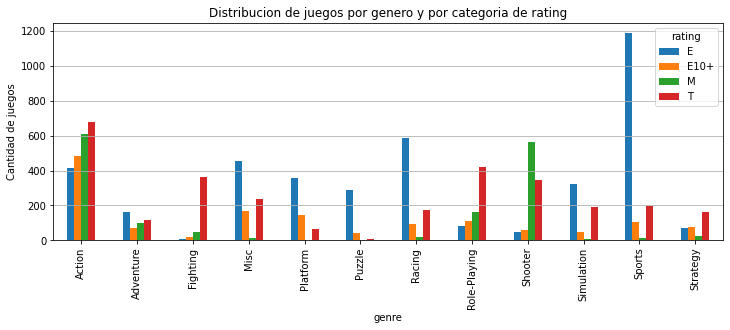

In [39]:
# Vamos a graficar la tabla para ver mejor
wip_games.groupby(['genre','rating']).count().unstack()['name'][['E','E10+','M','T']].plot(kind='bar',figsize=(12,4))
plt.grid(axis='y')
plt.ylabel('Cantidad de juegos')
plt.title('Distribucion de juegos por genero y por categoria de rating')
plt.show

Vamos a analizar genero por genero:
- Action: Presenta una distribucion bastante general con *T y M* demostrando tener la mayor cantidad de juegos.
- Adventure: A pesar de no tener tantos juegos totales, podemos ver como predomina E aunque las otras categorias no se quedan muy atras.
- Fighting: Aca si vemos una predominancia fuerte de la categoria *T* con *M* siguiendole muy por detras.
- Misc: Como era de esperar *E* presenta la mayor cantidad de datos con *T* situandose en el segundo lugar aparte de que *M* casi no presenta juegos.
- Platform: Un comportamineto parecido al de *Misc* con E liderando y E10+ siguiendole, aparted de *M* que ya ni se llega a ver.
- Puzzle: De vuelta lo mismo, vemos como *E* conforma practicamente todo el conjunto de datos del genero.
- Racing: Es uno de los generos que mayor dominancia de *E* tiene con casi 600 juegos en la categoria mientras que el resto ni llega a 200.
- Role-Playing: En este caso notamos como la predominancia la tiene *T* con mas del doble que cualquier otra categoria.
- Shooter: Podemos observar como *M* se queda con el primer puesto pero *T* no se queda particularmente atras.
- Simulation: Una vez mas volvimos al patron usual en el que *E* tiene la mayor cantidad de juegos, pero tambien notamos como *T* no se ubica tan lejos.
- Sports: He aqui el maximo exponente de la categoria *E* a tal punto que incluso nos deforma el grafico debido a los casi **1200** juegos que tiene.
- Strategy: Es algo dificil de observar debido al contraste de la cantidad total de juegos con *Sports* pero podemos notar como *T* se alza al primer puesto sin dominar el genero.
  
Tras realizar este analisis puedo llegar a la conclusion de que si hay generos que presentan una clara tendencia a tener un cierto `rating` de la misma forma que hay otros `genre` en los que asignarle un `rating` en base a la categoria mas alta es un error pues muchas veces pasa que hay mas juegos que **no** son ese genero (como en el caso de *Action*).
  
Por lo tanto ,y tras ponderar un momento, decidi que vamos a reemplazar los valores nulos en la columna de `rating` unicamente para los `genre` que presenten un buen balance entre la cantidad de datos totales que hay y la tendencia a tener una categoria en especifico. Para determinar lo segundo, voy a buscar que la categoria dominante tenga mas juegos que el resto de categorias juntas. 

In [40]:
wip_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,74.09,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,39.47,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,32.23,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,29.82,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,30.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


In [41]:
# Por lo tanto, hagamos un dict que nos ayude a reemplazar posteriormente
genre_to_rating = {
    'Fighting':'T',
    'Misc':'E',
    'Platform':'E',
    'Puzzle':'E',
    'Racing':'E',
    'Role-Playing':'T',
    'Shooter':'M',
    'Simulation':'E',
    'Sports':'E'
}

In [42]:
# Hacemos una funcion simple para reemplazar segun nuestro dict
def replace_rating(row):
    genre = row['genre']
    if pd.notna(row['rating']):
        return row['rating']
    if genre in genre_to_rating.keys():
        return genre_to_rating[genre]
    return np.nan

In [43]:
# Probamos que funcione
wip_games.apply(replace_rating,axis=1)

0          E
1          E
2          E
3          E
4          T
        ... 
16708    NaN
16709      E
16710    NaN
16711      E
16712      E
Length: 16713, dtype: object

In [44]:
# Ahora simplemente reemplazamos la columna `rating`
wip_games['rating'] = wip_games.apply(replace_rating,axis=1)

In [45]:
wip_games['rating'].isna().sum()

2382

Pasar de 6764 a 2382 nulos me parece un avance significativo aunque seguramente ESRB no apruebe nuestros metodos ya que hay una probabilidad de que hayamos categorizado erroneamente algun juego. Los nulos que nos quedaron los vamos a dejar simplemente asi ya que `rating` no forma una parte clave a la hora de contestar nuestras hipotesis.
  
Tristemente no se me ocurre un buen motivo que lleve a la falta de los datos ya que no vemos ningun patron fuertemente marcado en ninguna columna. La unica posibilidad que se me ocurre es que comparta el motivo de falta con la columna `user_score` pero el motivo de esa falta la analizaremos posteriormente.

### <a id='toc3_3_4_'></a>[Critic Score](#toc0_)
  
Ahora si estamos avanzando a las grandes ligas y vamos a ver que podemos hacer con esta columna y todos los valores nulos que tiene.

In [46]:
# Primero repasemos cuantos valores nulos teniamos
wip_games['critic_score'].isna().sum()

8576

Con mas del 50% de la columna faltante nos encontramos frente a un grave problema y tendremos que indagar bastante para encontrar pistas sobre que causó la desaparición de tantos datos. Primero veamos la tabla para poder guiarnos y ver si encontramos un camino.

In [47]:
wip_games.loc[wip_games.critic_score.isna(),:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,39.47,NaN,NaN,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,30.38,NaN,NaN,T
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,29.68,NaN,NaN,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,27.84,NaN,NaN,M
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,21.93,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,E
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,E


In [48]:
# Veamos si tenemos algun nulo en la columna user_score
wip_games.loc[wip_games.critic_score.isna(),:]['user_score'].notna().sum()

573

Una vez mas nos encontramos con que no hay ningun patron evidente que vincule las filas que carecen de valor en critic_score. Ante la imposibilidad de convencerla como fut- Digo, ante la imposibilidad de ver un patron dentro de los nulos lo mejor que podemos hacer es pasar directamente a ver que factores determinan el `critic_score` de un juego!

In [49]:
# Dado que vamos a trabajar mucho con este dataset, lo guardemos en una variable
critic_score_table = wip_games.loc[wip_games.critic_score.notna(),:]

In [50]:
# Le pegamos una mirada a la tabla
critic_score_table

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,74.09,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,32.23,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,29.82,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,26.92,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,26.07,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16694,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,0.01,61.0,5.8,T
16695,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,0.01,53.0,NaN,E
16696,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,0.01,48.0,NaN,E
16700,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,0.01,60.0,7.2,E10+


In [51]:
# Ahora miremos la distribucion de critic_score
wip_games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

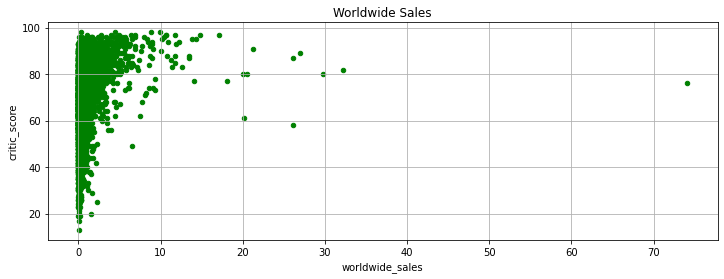

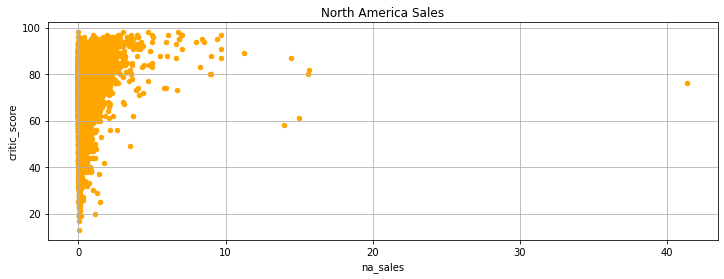

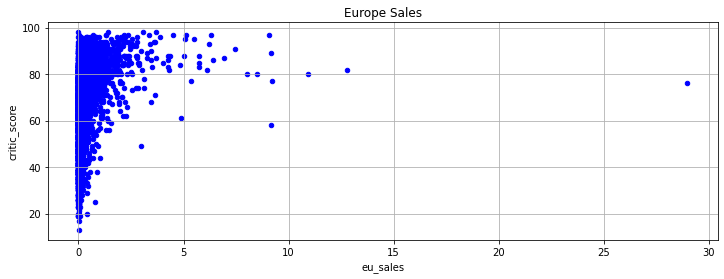

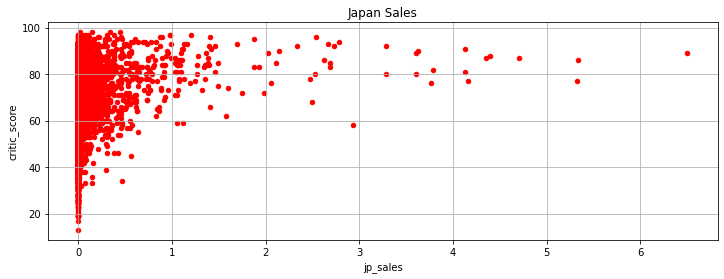

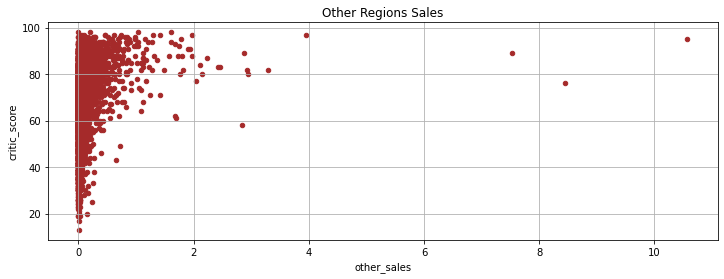

In [52]:
# Tambien hagamos un grafico filtrando por ventas y por region
critic_score_table.sort_values('worldwide_sales',ascending=True).plot(x='worldwide_sales',y='critic_score',kind='scatter',figsize=(12,4),c='green')
plt.grid()
plt.title('Worldwide Sales')

critic_score_table.sort_values('na_sales',ascending=True).plot(x='na_sales',y='critic_score',kind='scatter',figsize=(12,4),c='orange')
plt.grid()
plt.title('North America Sales')

critic_score_table.sort_values('eu_sales',ascending=True).plot(x='eu_sales',y='critic_score',kind='scatter',figsize=(12,4),c='blue')
plt.grid()
plt.title('Europe Sales')

critic_score_table.sort_values('jp_sales',ascending=True).plot(x='jp_sales',y='critic_score',kind='scatter',figsize=(12,4),c='red')
plt.grid()
plt.title('Japan Sales')

critic_score_table.sort_values('other_sales',ascending=True).plot(x='other_sales',y='critic_score',kind='scatter',figsize=(12,4),c='brown')
plt.grid()
plt.title('Other Regions Sales')

plt.show()

Lo bueno de los *scatter plots* es que nos permiten ver el comportamiento de una variable en dependencia de otra. Al principio hice sólo el gráfico de *worldwide_sales* pero ya que se sentía un poco insuficiente decidí agregar las otras categorias. Penosamente (o menos mal?) no podemos ver una relacion entre la cantidad de ventas y la nota de *critic_score*.

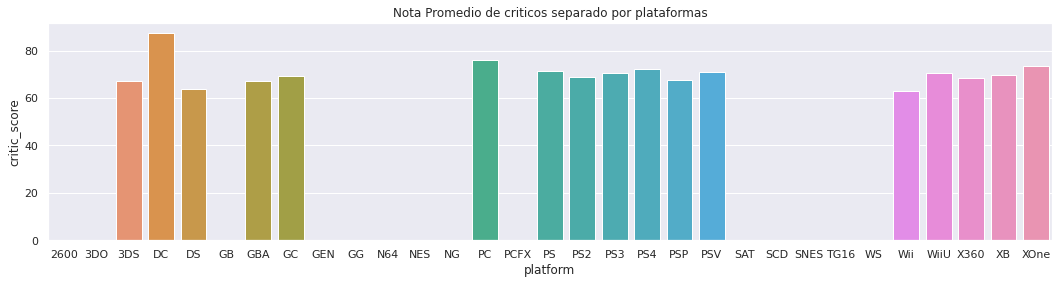

In [53]:
# Dado que no vemos una relacion entre las dos variables previas, veamos si la consolas tienen notas muy diferentes
# Primero cargamos los datos
data = wip_games[['platform','critic_score']].groupby('platform').mean().reset_index()

# De ahi establecemos el tamaño de la imagen antes de graficar
sns.set(rc={'figure.figsize':(18,4)})

# Finalmente graficamos, agregamos lineas y mostramos
sns.barplot(data= data, x='platform',y='critic_score').set(title='Nota Promedio de criticos separado por plataformas')
sns.set_style("whitegrid")
plt.show()

Vine buscando cobre y encontré oro! Me olvidé de filtrar para procesar unicamente las filas que tengan `critic_score` y por consecuencia podemos ver todas las consolas que no tienen datos. Tras una leve investigación puedo notar como casi todas las consolas previas o pertenecientes 1995 (aproximadamente) presentan ausentes en `critic_score`. Digo aproximadamente ya que la Play Station de 1ra generación si tiene valores. Se puede atribuir eso a la enorme popularidad que tuvo la consola lo que llevo a que la empresa se dedique a realizar reseñas principalmente de esa consola para apelar a una mayor audiencia... posiblemente, es solo una teoria... no muy fuerte ya que la N64 si fue popular y contemporanea a la PS... aunque salio en 1964.
  
De todas formas, esa explicación no aplica a todas las filas faltantes pues más arriba vemos como tambien hay juegos de la consola XBox360 que fue lanzada en 2006. Lo que queda entonces es ver cuantas filas nulas entran en esa categoria.

In [54]:
# Primero tiramos nuestro honor y hacemos manualmente la lista de las consolas que no tienen ni 1 critic_score en todo el df
nan_platforms = ['2600','3DO','GB','GEN','GG','N64','NES','NG','PCFX','SAT','SCD','SNES','TG16','WS']

In [55]:
# Ahora vemos con cuantos valores nulos nos quedamos
wip_games.loc[(~wip_games.platform.isin(nan_platforms) & (wip_games.critic_score.isna())),:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,21.93,NaN,NaN,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,16.88,NaN,NaN,T
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,15.34,NaN,NaN,T
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,14.33,NaN,NaN,T
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,12.25,NaN,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,E
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,E


No todo lo que brilla es oro pues solo eliminamos alrededor de 500 filas y aun nos quedan otras 7458. Supongo que no nos queda otra que optar por otro camino para ver como imputar los valores que nos faltan.

In [56]:
# Traemos una vez mas la tabla sin nulos en critic_score
critic_score_table

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,74.09,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,32.23,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,29.82,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,26.92,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,26.07,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16694,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,0.01,61.0,5.8,T
16695,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,0.01,53.0,NaN,E
16696,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,0.01,48.0,NaN,E
16700,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,0.01,60.0,7.2,E10+


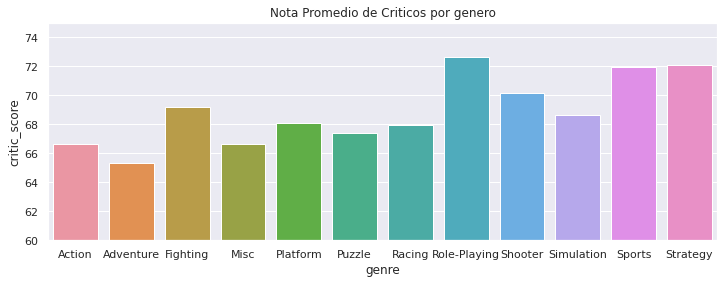

In [57]:
# Ahora vamos a graficar el critic_score por genre
# Cargamos los datos al igual que como hicimos previamente
data = critic_score_table[['genre','critic_score']].groupby('genre').mean().reset_index()

# Establecemos el tamaño de imagen previamente
sns.set(rc={'figure.figsize':(12,4)})

# Y finalmente graficamos, pero esta vez nos encargamos de delimitar el eje y para ver con mas precision
#sns.barplot(data= data, x="genre", y='critic_score',width=0.75).set(ylim=(60,75),title='Nota Promedio de Criticos por genero')
sns.barplot(data= data, x="genre", y='critic_score').set(ylim=(60,75),title='Nota Promedio de Criticos por genero')
sns.set_style("whitegrid")
plt.show()

De lo que podemos ver, hasta el momento ésta debe ser la columna que más nos puede servir para imputar los valores nulos de *critic_score* ya que si bien las diferencias no son muy grandes, ciertamente son todas diferentes. Veamos si alguna otra categoria más nos puede ayudar para que imputemos en base a dos columnas.

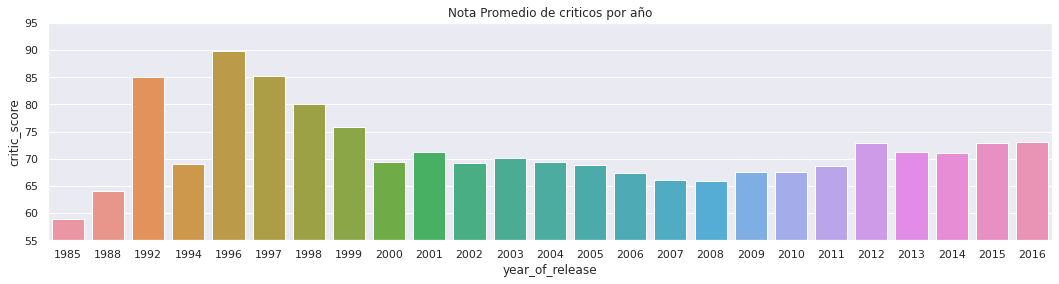

In [58]:
# Ahora vamos a graficar el critic_score por year_of_relese
# Cargamos los datos al igual que como hicimos previamente
data = critic_score_table[['year_of_release','critic_score']].groupby('year_of_release').mean().reset_index()

# Establecemos el tamaño de imagen previamente
sns.set(rc={'figure.figsize':(18,4)})

# Y finalmente graficamos, pero esta vez nos encargamos de delimitar el eje
#sns.barplot(data= data, x="year_of_release", y='critic_score',width=0.75).set(ylim=(55,95),title='Nota Promedio de criticos por año')
sns.barplot(data= data, x="year_of_release", y='critic_score').set(ylim=(55,95),title='Nota Promedio de criticos por año')
sns.set_style("whitegrid")
plt.show()

Al parecer el year_of_release del juego si juega un papel en la nota del juego aunque su impacto tiene más importancia en los años anteriores al 2000. De todas formas podemos usar el year_of_release para imputar los valores de critic_score. 
  
Tras analizar el comportamiento de critic_score respecto a las otras columnas nos encontramos con que solo hay 2 columnas con las que podremos buscar imputar los valores faltantes: year_of_release y genre. Por su cuenta no me traerian la confianza suficiente pero con las dos juntas podemos obtener unos resultados un poco mas confiables. De todas formas van a haber alrededor de 500 filas que vamos a tener que reemplazar con menor confianza ya que no hay `critic_score` para ningun juego de ese año.
  
Sin más vueltas, vamos a crear la funcion que nos ayude a eso.

In [59]:
# Antes de crear la funcion hagamos las tablas de las cuales vamos a obtener los datos
yol_critic_score = critic_score_table[['year_of_release','critic_score']].groupby('year_of_release').mean().reset_index()
genre_critic_score = critic_score_table[['genre','critic_score']].groupby('genre').mean().reset_index()

In [60]:
# Ahora si vamos a crear la funcion
def obtain_critic_score(row):
    
    # Primero verificamos si tiene un valor en critic_score y lo devolvemos de ser asi
    if pd.notna(row['critic_score']):
        return row['critic_score']
    
    # De ahi guardamos los valores que vamos a usar para mayor limpieza
    genre = row['genre']
    year_of_release = row['year_of_release']

    # Posteriormente obtenemos los valores de critic_score y los guardamos, para mayor limpieza
    genre_score = genre_critic_score.loc[genre_critic_score.genre == genre,'critic_score']
    yol_score = yol_critic_score.loc[yol_critic_score.year_of_release == year_of_release,'critic_score']

    # Verificamos si el juego pertenece a un año sin critic_score y devolvemos simplemente el valor obtenido por el genero de ser asi
    if yol_score.shape[0] == 0:
        return round(genre_score.values[0])
    
    # Finalmente obtenemos el promedio de los dos, lo redondeamos a 2 digitos y devolvemos el score que obtuvimos
    cr_score = round((yol_score.values[0] + genre_score.values[0])/2)
    return cr_score

In [61]:
# Probamos la funcion
wip_games.loc[[3,5,10,27,16710],:].apply(obtain_critic_score,axis=1)

3        80.0
5        67.0
10       69.0
27       70.0
16710    69.0
dtype: float64

In [62]:
# Vemos cuales juegos son para comprobar que todo este bien
wip_games.loc[[3,5,10,27,16710],:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,29.82,80.0,8.0,E
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,29.68,NaN,NaN,E
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,21.93,NaN,NaN,E
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,14.33,NaN,NaN,T
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN


In [63]:
# Dado que todo parece estar correcto vamos a imputar los valores!
wip_games['critic_score'] = wip_games.apply(obtain_critic_score,axis=1)

In [64]:
wip_games['critic_score'].isna().sum()

0

Perfecto, logramos imputar todos los valores de `critic_score` por lo que vamos a avanzar a la ultima etapa del reemplazo de nulos!

### <a id='toc3_3_5_'></a>[User Score](#toc0_)
  
Por si no era evidente, fuimos corrigiendo los nulos en orden ascendiente y se dio la mala casualidad de que justo la columna más importante del DataFrame es la que más nulos presenta. Para reemplazar vamos a realizar un trabajo muy similar al de `critic_score` y vamos a tratar de usar la mayor cantidad de columnas para cada fila.

In [65]:
# Primero vamos a ver los datos que no tienen user_score
wip_games.loc[wip_games.user_score.isna(),:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,39.47,64.0,NaN,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,30.38,81.0,NaN,T
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,29.68,67.0,NaN,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,27.84,70.0,NaN,M
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,21.93,69.0,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,70.0,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,70.0,NaN,E
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,69.0,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,69.0,NaN,E


In [66]:
# Voy a usar el df sin modificar para ver cuantas filas no tienen user_score pero si tienen critic_score
games.loc[(games.user_score.notna()) & (games.critic_score.notna()),:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,74.09,76.0,8.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,32.23,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,29.82,80.0,8.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,26.92,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,26.07,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16673,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,0.01,0.00,0.00,0.00,0.01,81.0,8.8,M
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,0.01,80.0,7.6,M
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,0.01,61.0,5.8,T
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.00,0.01,60.0,7.2,E10+


In [67]:
# Con los cambios hechos, voy a obtener la relacion promedio entre critic_score y user_score
(games.loc[games.critic_score.notna(),'critic_score']/games.loc[games.user_score.notna(),'user_score']).mean()

10.107998646355048

Bueno, eso habla bien de la fidelidad de la pagina ya que al parecer en promedio representa bien la opinion de la gente. Y nos ayuda a nostros ya que sabemos que en podemos dividir en 10 la `critic_score` para obtener el `user_score`... eso es si hay `critic_score`. Veamos en la original cuantas tablas se encontraban en esa situacion!

In [68]:
games.loc[(games.critic_score.notna()) & (games.user_score.isna()),:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
182,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.2,0.28,4.96,85.0,NaN,T
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,3.43,61.0,NaN,E10+
440,Need for Speed III: Hot Pursuit,PS,1998.0,Racing,2.14,0.86,0.0,0.13,3.00,88.0,NaN,E
637,Riven: The Sequel to Myst,PC,1997.0,Adventure,1.52,0.82,0.0,0.10,2.34,83.0,NaN,E
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,2.22,71.0,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16577,Space Raiders,GC,2003.0,Shooter,0.01,0.00,0.0,0.00,0.01,40.0,NaN,T
16669,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,0.01,0.00,0.0,0.00,0.01,72.0,NaN,T
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,0.01,67.0,NaN,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,0.01,53.0,NaN,E


In [69]:
# Guardemos los indices de esos valores para poder usarlos e imputar solamente los que les faltaba user_score y no critic_score
reference_index = games.loc[(games.critic_score.notna()) & (games.user_score.isna()),:].index.values

Okay, tenemos 1120 filas en las cuales podemos aplicar ese metodo para inputar los valores. Ahora habria que analizar que tanto determina `year_of_release` y `genre` el `user_score`. Comencemos con `genre`!

In [70]:
# Para eso necesitaremos una tabla con las filas que si tienen user_score
user_score_table = wip_games.loc[wip_games.user_score.notna(),:]

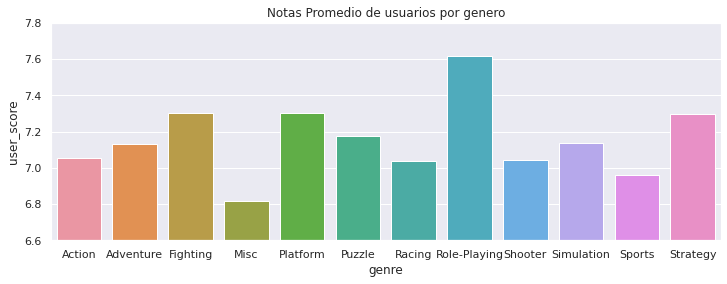

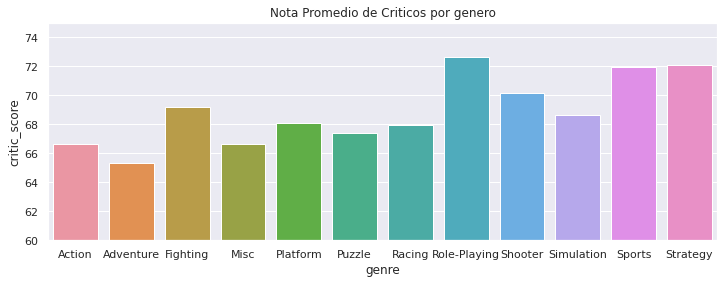

In [71]:
# Primero vamos a ver el comportamiento de user_score con genre
# Cargamos los datos
data = user_score_table[['genre','user_score']].groupby('genre').mean().reset_index()

# Establecemos el tamaño de imagen previamente
sns.set(rc={'figure.figsize':(12,4)})

# Y finalmente graficamos y nos encargamos de delimitar el eje y para ver con mas precision
#sns.barplot(data= data, x="genre", y='user_score',width=0.75).set(ylim=(6.6,7.8),title='Notas Promedio de usuarios por genero')
sns.barplot(data= data, x="genre", y='user_score').set(ylim=(6.6,7.8),title='Notas Promedio de usuarios por genero')
sns.set_style("whitegrid")

plt.show()

# De pura curiosidad voy a volver a graficar el mismo grafico de critic_score para ver como se comparan
data = critic_score_table[['genre','critic_score']].groupby('genre').mean().reset_index()

# Establecemos el tamaño de imagen previamente
sns.set(rc={'figure.figsize':(12,4)})

# Y finalmente graficamos, pero esta vez nos encargamos de delimitar el eje y para ver con mas precision
#sns.barplot(data= data, x="genre", y='critic_score',width=0.75).set(ylim=(60,75),title='Nota Promedio de Criticos por genero')
sns.barplot(data= data, x="genre", y='critic_score').set(ylim=(60,75),title='Nota Promedio de Criticos por genero')
sns.set_style("whitegrid")

plt.show()

De lo que podemos ver las notas de `user_score` tienden a ser mas altas proporcionalmente ya que parten desde 6.6 mientras que lo mas alto que podriamos ir sin dejar ninguna barra afuera en `critic_score` es 64. Tambien pareciera ser que `user_score` varian un poco mas respecto a los generos. Las unicas similaridades que vemos en los dos graficos son *Shooter* y *Strategy* que presentan valores similares mientras que el resto pueden ser más altos o más bajos.
  
De todas formas, encontramos lo que queriamos que es una minima relación entre el `genre` y `user_score`. Sin dar más vueltas vamos a ver como se comporta con `year_of_release`.

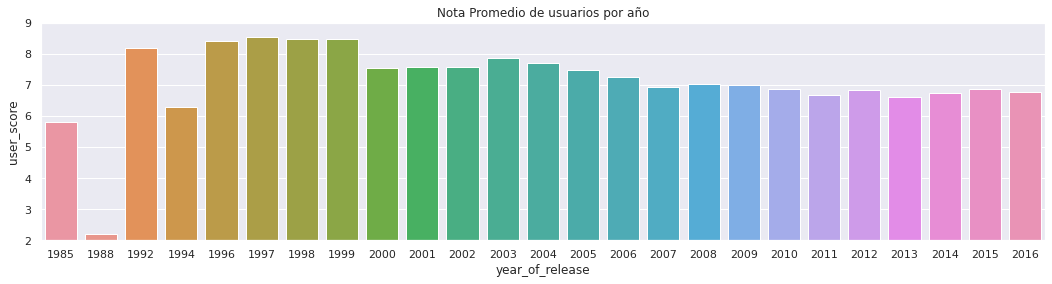

In [72]:
# Ahora vamos a graficar el critic_score por genre
# Cargamos los datos al igual que como hicimos previamente
data = critic_score_table[['year_of_release','user_score']].groupby('year_of_release').mean().reset_index()

# Establecemos el tamaño de imagen previamente
sns.set(rc={'figure.figsize':(18,4)})

# Y finalmente graficamos, pero esta vez nos encargamos de delimitar el eje
#sns.barplot(data= data, x="year_of_release", y='user_score',width=0.75).set(ylim=(2,9),title='Nota Promedio de usuarios por año')
sns.barplot(data= data, x="year_of_release", y='user_score').set(ylim=(2,9),title='Nota Promedio de usuarios por año')
sns.set_style("whitegrid")
plt.show()

En el caso de `user_score` vemos algo parecido al caso de `critic_score` pero con una menor intensidad. Podemos ver como conforme avanzan los años el `user_score` promedio va disminuyendo (ignoremos 1988) aunque con una pendiente mucho menor de tal forma que un año jamas está muy lejos de los cercanos, cosa que no pasaba con `critic_score`. Y una cosa más que quiero revisar es si el patron de `critic_score` se repite en `user_score`.

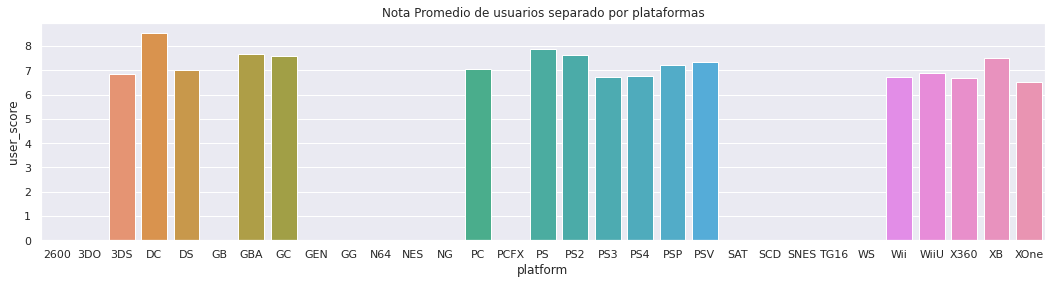

In [73]:
# Dado que no vemos una relacion entre las dos variables previas, veamos si la consolas tienen notas muy diferentes
# Primero cargamos los datos
data = wip_games[['platform','user_score']].groupby('platform').mean().reset_index()

# De ahi establecemos el tamaño de la imagen antes de graficar
sns.set(rc={'figure.figsize':(18,4)})

# Finalmente graficamos, agregamos lineas y mostramos
sns.barplot(data= data, x='platform',y='user_score').set(title='Nota Promedio de usuarios separado por plataformas')
sns.set_style("whitegrid")
plt.show()

In [74]:
# Y veamos cuantas filas representan esas plataformas antiguas
wip_games.loc[(~wip_games.platform.isin(nan_platforms) & (wip_games.user_score.isna())),:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,21.93,69.0,NaN,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,16.88,70.0,NaN,T
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,15.34,71.0,NaN,T
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,14.33,70.0,NaN,T
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,12.25,72.0,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,70.0,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,70.0,NaN,E
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,69.0,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,69.0,NaN,E


Notamos que son aproximadamente unas 1100 filas, una porcion mayor a lo que era en el caso de `critic_score` aunque creo que vamos a usar casi el mismo metodo que usamos para inputar. Digo casi el mismo ya que para el caso de las filas que tengan `critic_score` vamos a guiarnos de esa nota.

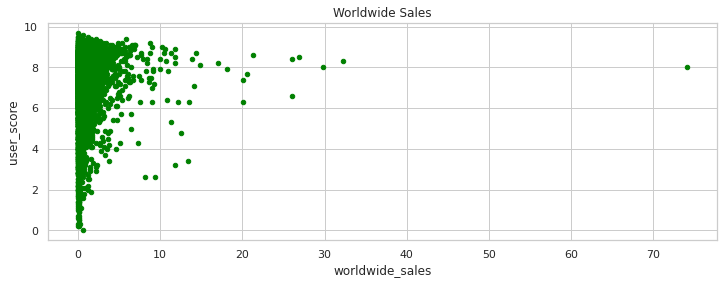

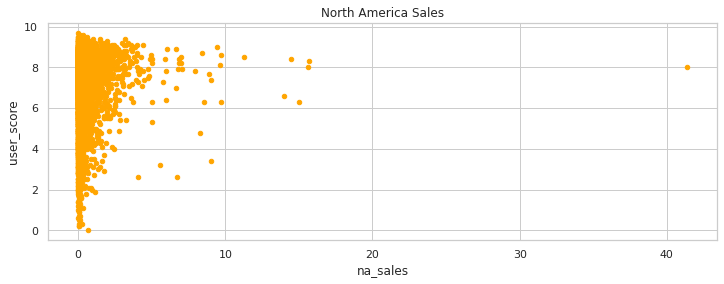

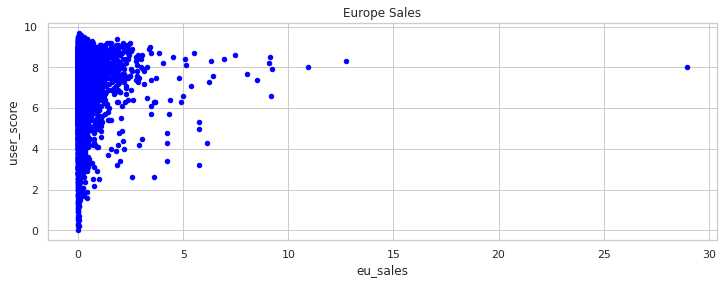

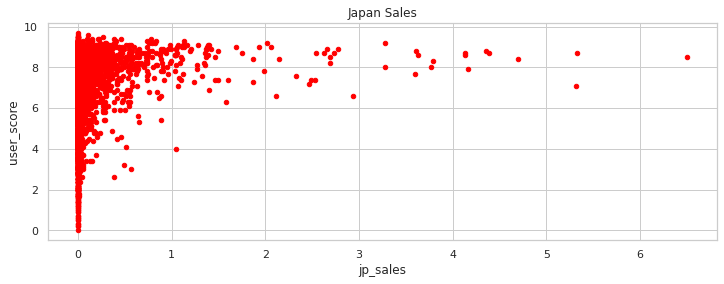

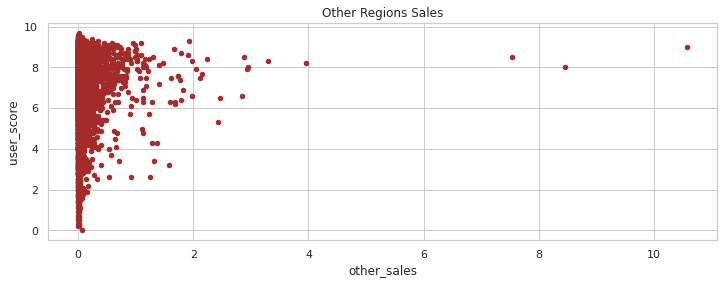

In [75]:
# Tambien hagamos un grafico filtrando por ventas y por region
user_score_table.sort_values('worldwide_sales',ascending=True).plot(x='worldwide_sales',y='user_score',kind='scatter',figsize=(12,4),c='green')
plt.title('Worldwide Sales')

user_score_table.sort_values('na_sales',ascending=True).plot(x='na_sales',y='user_score',kind='scatter',figsize=(12,4),c='orange')
plt.title('North America Sales')

user_score_table.sort_values('eu_sales',ascending=True).plot(x='eu_sales',y='user_score',kind='scatter',figsize=(12,4),c='blue')
plt.title('Europe Sales')

user_score_table.sort_values('jp_sales',ascending=True).plot(x='jp_sales',y='user_score',kind='scatter',figsize=(12,4),c='red')
plt.title('Japan Sales')

user_score_table.sort_values('other_sales',ascending=True).plot(x='other_sales',y='user_score',kind='scatter',figsize=(12,4),c='brown')
plt.title('Other Regions Sales')

plt.show()

Como era de esperar, tampoco vemos un patron muy evidente entre `user_score` y las ventas. Por lo tanto, vamos a seguir con un procedimiento muy similar al que tuvimos con `critic_score`. 
  
Vamos a crear una funcion que:
- Reemplace los nulos en las filas que originalmente tenian valores en `critic_score` dividiendo el mismo en 10,1
- Reemplace los nulos en el resto de filas utilizando valores promedios de `genre` y `year_of_release`

In [76]:
wip_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,74.09,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,39.47,64.0,NaN,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,32.23,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,29.82,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,30.38,81.0,NaN,T
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,70.0,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,70.0,NaN,E
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,69.0,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,69.0,NaN,E


In [77]:
# Antes de crear la funcion hagamos las tablas de las cuales vamos a obtener los datos
yol_user_score = user_score_table[['year_of_release','user_score']].groupby('year_of_release').mean().reset_index()
genre_user_score = user_score_table[['genre','user_score']].groupby('genre').mean().reset_index()

In [78]:
def obtain_user_score(row):
    # Primero verificamos si tiene un valor en critic_score y lo devolvemos de ser asi
    if pd.notna(row['user_score']):
        return row['user_score']

    # Verificamos si originalmente la fila tenia un valor en critic_score y lo usamos para obtener el valor de ser asi
    if row.name in reference_index:
        return round((row['critic_score']/10.1),1)

    # De ahi guardamos los valores que vamos a usar para mayor limpieza
    genre = row['genre']
    year_of_release = row['year_of_release']

    # Posteriormente obtenemos los valores de critic_score y los guardamos, para mayor limpieza
    genre_score = genre_user_score.loc[genre_user_score.genre == genre,'user_score']
    yol_score = yol_user_score.loc[yol_user_score.year_of_release == year_of_release,'user_score']

    # Verificamos si el juego pertenece a un año sin user_score y devolvemos simplemente el valor obtenido por el genero de ser asi
    if yol_score.shape[0] == 0:
        return round(genre_score.values[0])
        
    # Finalmente obtenemos el promedio de los dos, lo redondeamos a 2 digitos y devolvemos el score que obtuvimos
    cr_score = round((yol_score.values[0] + genre_score.values[0])/2,1)
    return cr_score

In [79]:
# Aplicamos la funcion a unas filas seleccionadas
wip_games.loc[[1,3,182],:].apply(obtain_user_score,axis=1)

1      6.6
3      8.0
182    8.4
dtype: float64

In [80]:
# Verificamos como eran las filas originalmente
games.loc[[1,3,182],:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,worldwide_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,39.47,NaN,NaN,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,29.82,80.0,8.0,E
182,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.20,0.28,4.96,85.0,NaN,T


In [81]:
# Finalmente imputamos los valores con nuestra funcion
wip_games['user_score'] = wip_games.apply(obtain_user_score,axis=1)

In [82]:
# Y revisamos si nos quedo algun valor nulo
wip_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
worldwide_sales       0
critic_score          0
user_score            0
rating             2382
dtype: int64

Solo nos quedaron los valores en `rating` que decidimos dejar ya que no influencian en nuestras pruebas de hipotesis y para nuestro estudio en general no representan un valor muy trascendental.
  
Con el trabajo pesado de lidiar con los nulos terminado podemos empezar a exprimir el jugo a nuestro dataset.

# <a id='toc4_'></a>[Analisis Exploratorio de Datos](#toc0_)

En esta etapa vamos a proceder a ignorar levemente las hipótesis que tenemos que contestar y nos vamos a dedicar más a observar diferentes comportamientos de los datos, compararlos entre sí, buscar dependencias entre ellos y sobre todo, hacer uso de herramientas gráficas para ver de mejor manera esos patrones y dibujos escondidos en éste DataFrame.

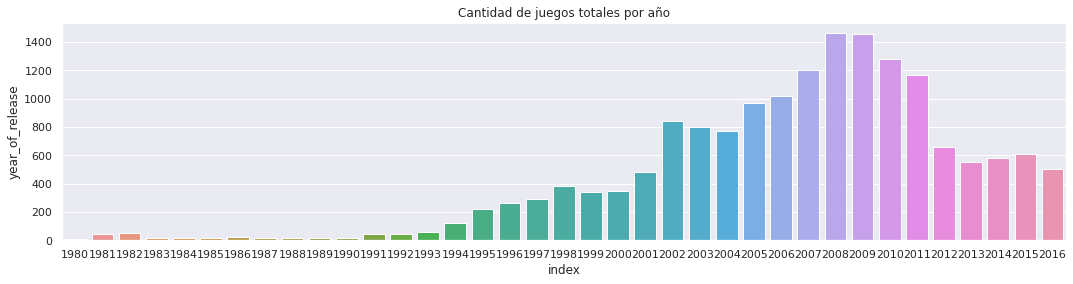

In [83]:
# Para ver eso vamos a usar una noble funcion como value_counts y con su ayuda haremos un grafico de barras
# Antes de guardar la tabla le reiniciamos el indice, lo la transforma en un dataframe y nos permite trabajar con ella
data = wip_games['year_of_release'].value_counts().reset_index()

# De ahi definimos el tamaño del grafico
sns.set(rc={'figure.figsize':(18,4)})

# Finalmente graficamos
#sns.barplot(data= data,x='year_of_release',y='count').set(title='Cantidad de juegos totales por año')
sns.barplot(data= data,x='index',y='year_of_release').set(title='Cantidad de juegos totales por año')# EDITADO PORQUE NO COMPILABA

# Y no nos olvidamos el show para que todo quede limpio
plt.show()

De lo que podemos ver tenemos la gran mayoria de los datos entre 1998 y 2016 con los picos en 2008 y 2009. En base a esto podemos decidir que para mantener la fidelidad de nuestro análisis podriamos reducir los años que vamos a tomar en cuenta a la hora de hacer nuestros análisis. Para definir donde vamos a tomar el valor por debajo de 2008 más cercano a 2016: 1998. Cualquier juego fuera de ese rango se encuentra en un periodo con tan pocos datos que nos dificulta obtener conslusiones fehacientes respecto a que tanto puede representar un único juego a todo el año. Y si uno lo piensa bien, en los 18 años entre 1998 y 2016 las tecnologías han cambiado de forma una forma completamente explosiva y los videojuegos no se quedaron atrás.
  
Con eso último en mente, me parece que lo mejor que podemos hacer es reducir el espectro de vista a un rango cercano a la actualidad y relativamente chico. Para buscar otorgar mejor entendimiento a lo que se puede venir vamos a observar únicamente los últimos 3 años.

## <a id='toc4_1_'></a>[Análisis en base a `platform`](#toc0_)

Si bien acabo de definir que nos ibamos a centrar únicamente en los últimos 3 años, para ésta parte únicamente voy a analizar todo el espectro de tiempo disponible para obtener cuales fueron las plataformas con más juegos vendidos de la historia.

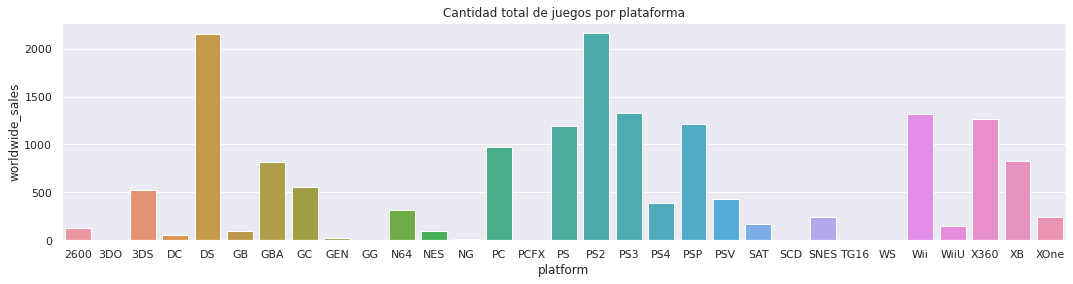

In [84]:
# Antes que nada vamos a ver con cuántos juegos cuenta cada plataforma
data = wip_games[['worldwide_sales','platform']].groupby('platform').count().reset_index()

# Definimos el tamaño de nuestro gráfico
sns.set(rc={'figure.figsize':(18,4)})

# Graficamos
sns.barplot(data= data,x='platform',y='worldwide_sales').set(title='Cantidad total de juegos por plataforma')

# Y no nos olvidamos el show para que todo quede limpio
plt.show()

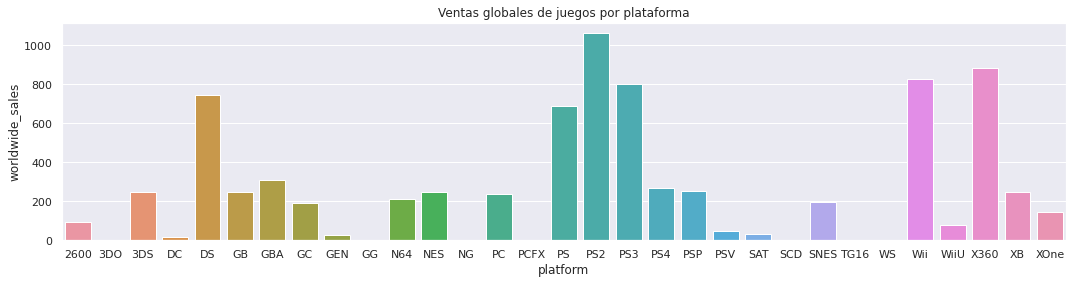

In [85]:
# Tambien veamos la cantidad total de ventas en juegos por plataforma
data = wip_games[['worldwide_sales','platform']].groupby('platform').sum().reset_index()

# Definimos el tamaño de nuestro gráfico
sns.set(rc={'figure.figsize':(18,4)})

# Graficamos
sns.barplot(data= data,x='platform',y='worldwide_sales').set(title='Ventas globales de juegos por plataforma')

# Y no nos olvidamos el show para que todo quede limpio
plt.show()

Es un grafico muy interesante de ver... Lo primero que podemos notar es como hay 6 plataformas que se levantan por encima de la mayoria con 1 rey muy evidente. Esos son:
1. PlayStation 2
2. Xbox 360
3. Nintendo Wii
4. PlayStation 3
5. Nintendo DS
6. PlayStation 1
  
Cabe destacar que éste gráfico es de las ventas totales de **los juegos**, no las consolas, por lo que más que una representación del éxito de la consola en sí habla más del éxito de los juegos de las mismas. Tambien hay que darle puntos a Sony por tener todas sus consolas en el Top 6 y a Nintendo por lograr que una consola portátil se encuentre en ésta categoría. Por último me llamó la atención que PC se encuentre tan bajo... aunque en retrospectiva la PC da una opción que las consolas no tienen tan fácil, la piratería... aunque eso está mal y no hay que hacerlo...no.
  
En resumen, logramos identificar nuestras próximas ratas de laboratorio sobre las cuales realizaremos diferentes experimentos para que nos revelen sus más oscuros secretos (Vamos a indagar haciendo diferentes enfoques).

Ahora veamos la evolución de éste top 6 a lo largo de los años.

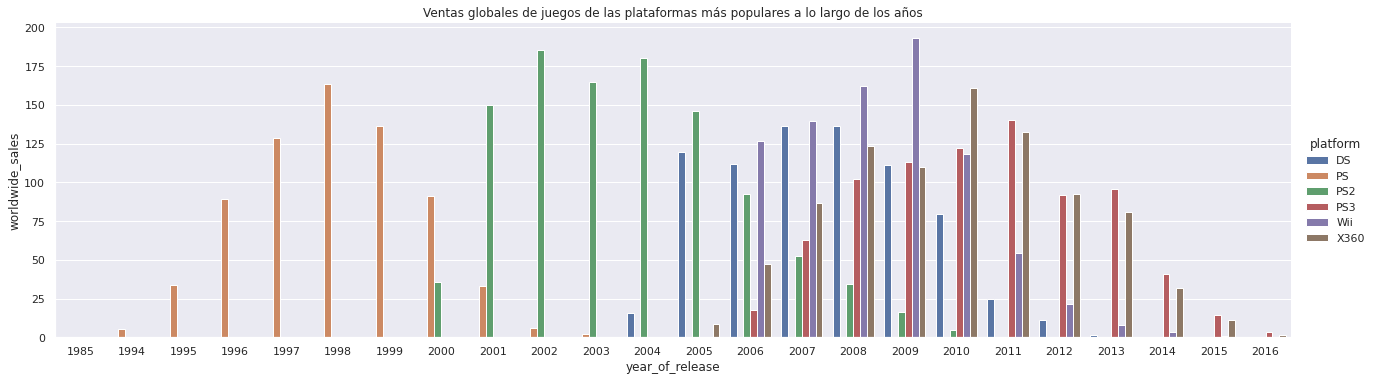

In [86]:
# Primero definimos una lista con las plataformas que nos interesan
top_platforms = ['PS2','X360','Wii','PS3','DS','PS']

# De ahi hacemos uso de un groupby para obtener los datos que nos interesan, no sin olvidarnos de reset_index
data = wip_games.loc[wip_games.platform.isin(top_platforms),['worldwide_sales','platform','year_of_release']].groupby(['platform','year_of_release']).sum().reset_index()

# Finalmente llamamos a catplot, le pasamos los datos, definimos que sea de barras y determinamos el tamaño para mejor visualizacion
sns.catplot(data=data,x='year_of_release',y='worldwide_sales',hue='platform',kind='bar',height=5,aspect=3.6).set(title='Ventas globales de juegos de las plataformas más populares a lo largo de los años')


# Por ultimo usamos show para dejar todo lo más limpiio posible 
plt.show()

Este gráfico puede parecer un poco complicado pero de suerte seaborn tiene una paleta de colores que facilita bastante la interpretación. Si nos detenemos a mirar cada una de las consolas podemos observar como todas tienen una "vida" de entre 7 a 10 años. Los primeros 11 años son fáciles de leer pues solo tenemos 2 consolas en simultaneo con PS estando sola la mayoría, pero por encima del 2005 las cosas se empiezan a complicar con todas las consolas apareciendo. Más allá de eso podemos observar como la mayoria de las consolas siguen aprocimadamente la curva que se vé claramente en la PS, digo aproximadamente ya que las dos consolas de Nintendo (DS y Wii) presentan un comportamiento muy interesante ya que el primer año que salen demuestran pocas ventas pero el siguiente se levantan multiples veces por encima para despues seguir una curva más similar al resto.
  
Una información clave que podemos obtener es que la mayoría de las plataformas relevantes se encuentran después del 2005 ya que las anteriores simplemente no triunfaban y esas épocas (junto con muchas infancias) fueron definidas por las consolas PS y PS2. Y si tuvieramos que elegir un año en particular ese sería el 2009 o el 2010 ya que presentan la mayor cantidad de ventas totales. 
  
Por lo tanto, podemos concluir que la mayoria de las consolas populares cumplen un ciclo de 8.5 años tras el cual o son reemplazados por una consola de la siguiente generación de la misma empresa o de otra empresa. Cabe destacar, todo éste análisis está hecho para las consolas más populares y seguramnte no aplique para las que no fueron tan populares o *PC*.
  
Ahora vamos a proceder a realizar el análisis de los últimos 3 años de las plataformas para así poder hacernos una idea de que nos depara el próximo año.

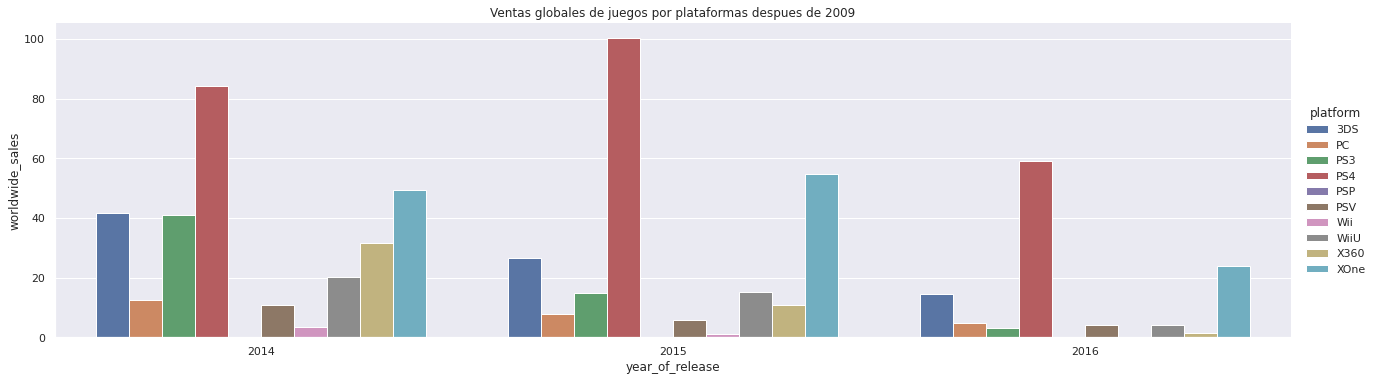

In [87]:
# Para eso filtramos el df para solo ver filas del 2012 en adelante y aplicamos groupby como veniamos haciendo
data = wip_games.loc[wip_games.year_of_release > 2013,['worldwide_sales','platform','year_of_release']].groupby(['platform','year_of_release']).sum().reset_index()

# Finalmente llamamos a catplot, le pasamos los datos, definimos que sea de barras y determinamos el tamaño para mejor visualizacion
sns.catplot(data=data,x='year_of_release',y='worldwide_sales',hue='platform',kind='bar',height=5,aspect=3.6).set(title='Ventas globales de juegos por plataformas despues de 2009')


# Por ultimo usamos show para dejar todo lo más limpiio posible 
plt.show()

Ciertamente hicimos bien en graficar todas las consolas pues acá podemos ver como *XOne* y *PS4* no entraron en el top 6 ya que a pesar de tener una buena cantidad de ventas anuales, al ser tan reciente no lograron acumular las ventas totales para entrar en el top. Algo que tambien podemos ver en éste gráfico es el comienzo de la transición entre la 3ra generación (*PS3 y X360*) y la 4ta generación (*PS4 y XOne*) con la *PS4* liderando ésta generación. Otra cosa que podemos ver es como la *Nintendo DS* dominó absolutamente el mercado de consolas móviles siendo que la *PSP y PSV* no llegaron a acercarse a las ventas de la sucesora de la *DS*, la *3DS* aún siendo que ésta no le llega a los talones a su predecesora.
  
Un detalle que cabe destacar es el fracaso que fue la WiiU ya que jamas se acercó en lo mínimo ni a las consolas de su misma generación. 
  
Por último, con lo aprendido de éste gráfico, quiero comparar el ingreso promedio por juego según las diferentes plataformas.

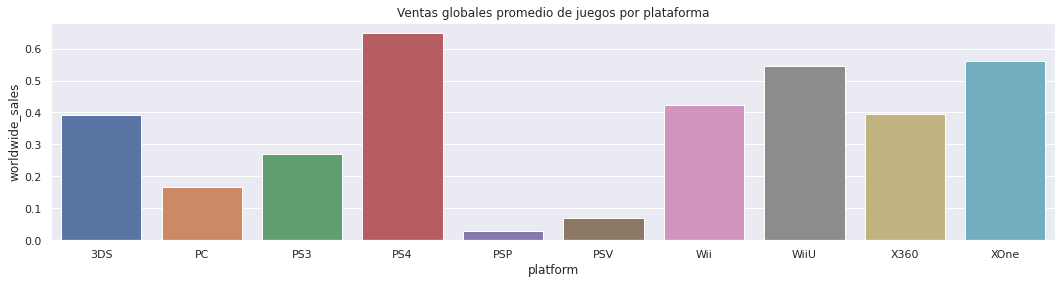

In [88]:
# De ahi hacemos uso de un groupby para obtener los datos que nos interesan, no sin olvidarnos de reset_index
data = wip_games.loc[wip_games.year_of_release > 2013,['worldwide_sales','platform']].groupby(['platform']).mean().reset_index().sort_values(by='platform')

# Definimos el tamaño de nuestro gráfico
sns.set(rc={'figure.figsize':(18,4)})

# Finalmente llamamos a catplot, le pasamos los datos, definimos que sea de barras y determinamos el tamaño para mejor visualizacion
sns.barplot(data=data,x='platform',y='worldwide_sales').set(title='Ventas globales promedio de juegos por plataforma')


# Por ultimo usamos show para dejar todo lo más limpiio posible 
plt.show()

Éste gráfico ciertamente es interesante... Al parecer la mayoría de plataformas no siguen la filosofía de 'calidad sobre cantidad' ya que vemos como aún el mejor promedio, el de *PS4* apenas sobrepasa las 0.6 millones de ventas.
  
Ésto demuestra porque a mi no me gusta jamas ver primero los promedios ya que pueden mostrar cosas completamente diferentes a lo que muestra la totalidad. Pero ciertamente nos da una buena perspectiva del comportamiento general de los juegos en sí.
  
Ahora lo que vamos a buscar no es ver el total de las ventas por plataformas, sino la distribución de que tanto se venden los juegos. Para eso vamos a usar el gráfico de cajas y bigotes separando por plataformas.

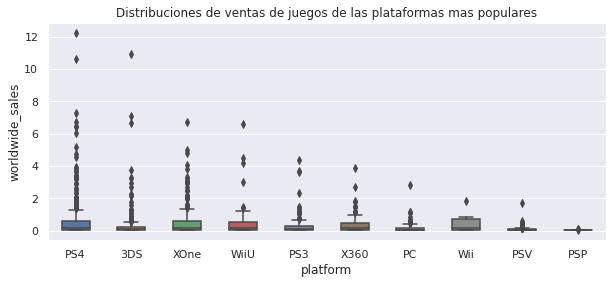

In [89]:
# Primero vamos a observar las distribuciones del top 6 de plataformasc
data = wip_games.loc[wip_games.year_of_release > 2013,['worldwide_sales','platform']]

# No hay necesidad de hacer un grafico de cajas muy ancho
sns.set(rc={'figure.figsize':(10,4)})

# Graficamos
sns.boxplot(data=data,x='platform',y='worldwide_sales',width=0.5).set(title='Distribuciones de ventas de juegos de las plataformas mas populares')

# Finalmente el show
plt.show()

Uno podría decir: Que feos gráficos! Y... tendría razón, pero que sean feos no significan que no nos eseñen nada de los datos. Si lo pensamos bien, el gráfico de barras anterior nos dió una pista de que nos ibamos a encontrar algo así ya que si bien la suma total de ventas de las consolas eran muy altas, sus promedios no. Y efectivamente vemos eso, no tamos como la mayoría de los juegos de las consolas más altas se encuentran casi en 0 bajo ésta perspectiva. Hagamos un poco de zoom y veamos con más detalle las cajas!

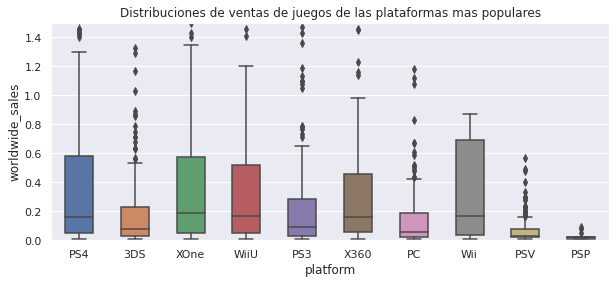

In [90]:
# Primero vamos a observar las distribuciones del top 6 de plataformas
data = wip_games.loc[wip_games.year_of_release > 2013,['worldwide_sales','platform']]

# No hay necesidad de hacer un grafico de cajas muy ancho
sns.set(rc={'figure.figsize':(10,4)})

# Graficamos
sns.boxplot(data=data,x='platform',y='worldwide_sales',width=0.5).set(title='Distribuciones de ventas de juegos de las plataformas mas populares')

# Hacemos un poco de zoom
plt.ylim((0,1.5))

# Finalmente el show
plt.show()

Ahora si podemos ver las cajas! Efectivamente era como decíamos y podemos ver como la mediana de ninguna plataforma supera las 0.2 millones de ventas, por supuesto no hay que negar la enorme cantidad de valores atípicos que ya rondan en los 4, 8, 10 y hasta +12 millones de ventas!
  
En el siguiente paso quiero poner en perspectiva que tán grande son las consolas del top 6 comparandolas con las consolas actuales. Ésto va a servir ya que en los gráficos anteriores las consolas perteneciente al top 6 siguen apareciendo pero solo los últimos juegos, lo que yo quiero hacer es medir el verdadero poder del top 6 así podemos ver que tan lejos o cerca están las nuevas generaciones de llenar los zapatos de los grandes.

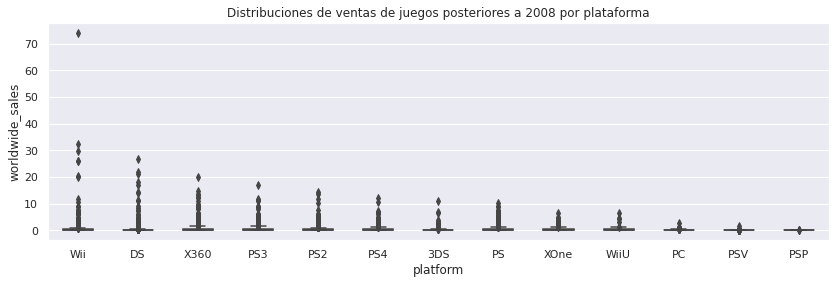

In [91]:
# Ahora vamos a ver respecto a las consolas mas modernas
data = wip_games.loc[(wip_games.platform.isin(top_platforms))|(wip_games.year_of_release > 2013),['worldwide_sales','platform']]

# En este caso si debemos hacer el grafico mas ancho para poder distinguir mejor todo
sns.set(rc={'figure.figsize':(14,4)})

# Graficamos
sns.boxplot(data=data,x='platform',y='worldwide_sales',width=0.5).set(title='Distribuciones de ventas de juegos posteriores a 2008 por plataforma')

# Finalmente el show
plt.show()

Una vez más podemos ver como más que un gráfico de cajas tenemos uno de líneas, también podemos notar que por más que la *PS4* haya parecido muy grande antes, aún le queda un buen camino para estar en las ligas mayores. Vamos a hacer lo mismo que hicimos previamente y haremos un poco de zoom.

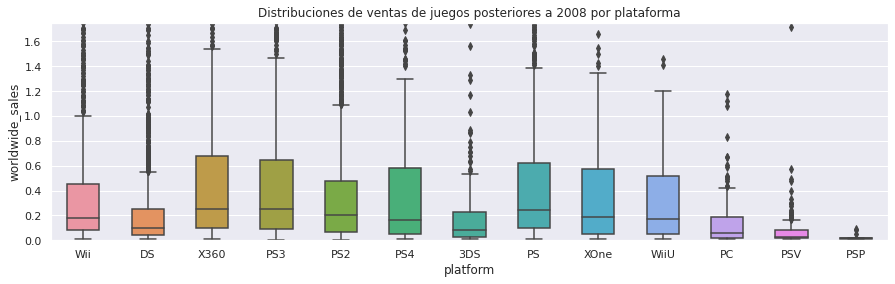

In [92]:
# Cargamos de vuelta los datos
data = wip_games.loc[(wip_games.platform.isin(top_platforms))|(wip_games.year_of_release > 2013),['worldwide_sales','platform']]

# En este caso si debemos hacer el grafico mas ancho para poder distinguir mejor todo
sns.set(rc={'figure.figsize':(15,4)})

# Graficamos
sns.boxplot(data=data,x='platform',y='worldwide_sales',width=0.5).set(title='Distribuciones de ventas de juegos posteriores a 2008 por plataforma')

# Hacemos más zoom una vez más
plt.ylim(0,1.75)

# Finalmente el show
plt.show()

Como podemos notar, al incluir todas las plataformas modernas nos encontramos con que en promedio los juegos no llegan a recaudar cantidades muy altas en el formato elegido. Quizas si en vez de millones se usaba cientos de miles como unidad o decenas de miles nos encontrariamos con gráficos que parecieran más a pesar de ser lo mismo. Otra cosa que notamos es como las ventas totales de las plataformas parecen estar más relacionadas con los valores atípicos que con los valores medios o dentro de lo normal.

Vuelvo a recordar, éstos gráficos demuestran las ventas de los juegos de las respectivas consolas y no las consolas en sí por lo que hay que agarrar con pinzas cuando me refiero al éxito o fracaso de una consola. De todas formas, tampoco es que estamos completamente errados en atribuír algún grado de éxito o fracaso a una consola en base a sus juegos pues es lógico pensar que una buena consola no es suficiente por su cuenta, también requiere de buenos juegos que la acompañen. 

### <a id='toc4_1_1_'></a>[Análisis de relación entre ventas y notas para la PS2](#toc0_)

Por último quiero poner a prueba una duda y esa es si las reseñas (tanto usuarios como críticos) afectan las ventas de un juego. Para reducir los datos y no tener un enjambre de puntos como vimos anteriormente vamos a buscar elegir una consola sobre la cual realizaremos los análisis. Para ésto vamos a elegir la milenaria PlayStation 2, ésto se debe a dos motivos:
1. Cuenta con la mayor cantidad de ventas, juegos y presencia a lo largo de todo el dataset
2. La otra opción (Nintendo DS) es una consola portátil que encima se levanta demasiado dentro de su categoría, lo que la hace extrmadamente particular

In [93]:
# Creamos una tabla unicamente con los juegos de PS2
PS2_table = wip_games.loc[wip_games.platform == 'PS2',:]

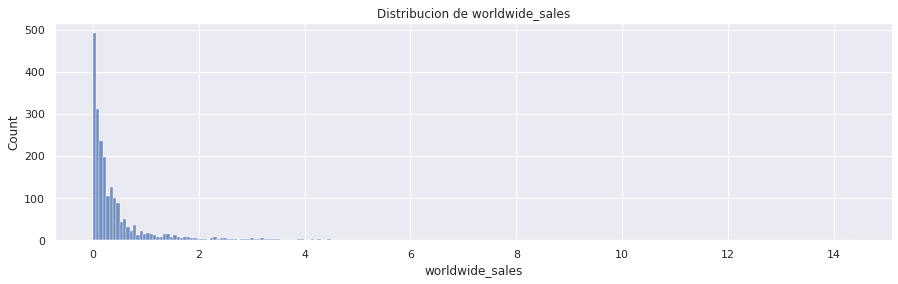

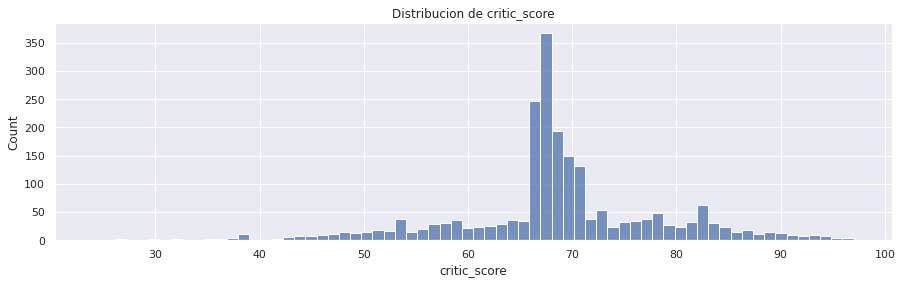

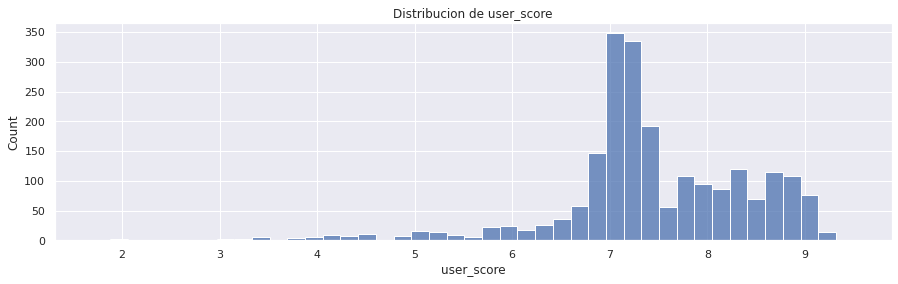

In [94]:
# Primero observemos la distribucion de tanto worldwide_sales como de ambos score
for column in ['worldwide_sales','critic_score','user_score']:
    sns.histplot(data=PS2_table,x=column).set(title=f'Distribucion de {column}')
    plt.show()

Podemos observar que la gran mayoria de juegos no superan las 2 millones de ventas y vemos como el `critic_score` se centra cerca de 67 mientras que los `user_score` se concentran mas un poco por encima de 7. Tambien podemos notar que a pesar de que la mayoria de los juegos no superen 2M de ventas, hay valores atipicos que pueden superar las 10 millones de ventas, nientras que los valores atipicos de los *score* no parecen bajar demasiado de 30 y 2 respectivamente.
 
Ahora vamos a buscar analizar si hay alguna relacion entre el las ventas y los scores.

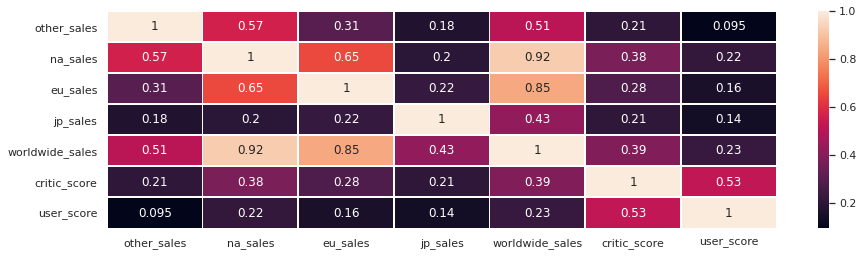

In [95]:
# Primero obtenemos una matriz de correlacion
data = PS2_table[['other_sales','na_sales','eu_sales','jp_sales','worldwide_sales','critic_score','user_score']].corr()

# De ahi hacemos un heatmap para visualizar de mejor manera los datos obtenidos en la matriz
sns.heatmap(
    data=data, linewidths = 0.75,
    linecolor = 'white',annot = True
    )
plt.show()

Para poder interpretar éste hermoso gráfico simplemente hay que mirar a las últimas dos columnas de la derecha. Lo que podemos observar es que ninguna región se ve afectada por las notas ni de los críticos ni de los usuarios (y visceversa). Por supuesto, vemos como las ventas poseen correlación... entre regiones? Supongo que eso debe ser una coincidencia, aunque no es lo importante. Lo importante es que ningún valor entre las ventas y los puntajes demuestra una correlación significativa como para afirmar que la tienen. De todas formas, no nos vamos a quedar solo con los gráficos.

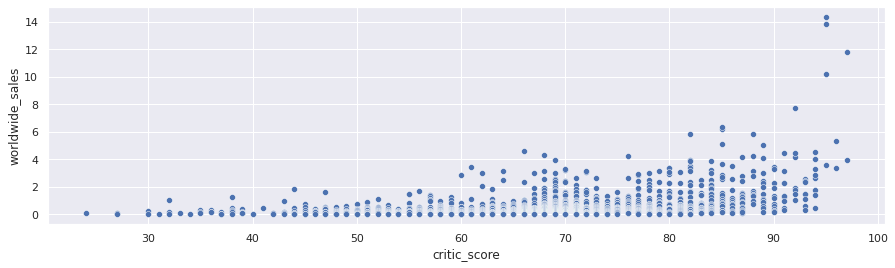

In [96]:
sns.scatterplot(data=PS2_table,x='critic_score',y='worldwide_sales')
plt.show()

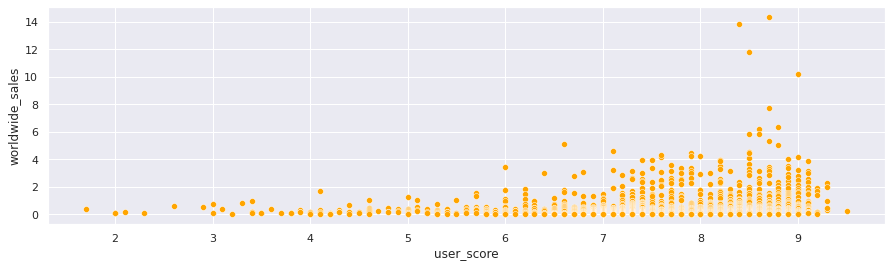

In [97]:
sns.scatterplot(data=PS2_table,x='user_score',y='worldwide_sales',color='orange')
plt.show()

Con la perspectiva de la matriz de correlación en mente, solo me voy a limitar a ver éstos gráficos. Pero ciertamente podemos notar lo que mostrban, pues afirmar una relación fuerte es decir demasiado. Uno podría pensar que como no vemos juegos con baja nota y muchas ventas quizas si hay alguna relación entre las columnas, pero si lo complementamos con los histogramas que vimos previamente podemos entender que un juego con baja nota es dificil de obtener de por sí, y un juego con bajas ventas es lo más normal que hay.
  
Por lo tanto, no tenemos evidencia suficiente para afirmar que haya una relación significativa entre las notas (tanto de usuarios como de críticos) y las ventas (más allá de la región).

## <a id='toc4_2_'></a>[Análisis en base a `genre`](#toc0_)

Ahora vamos a buscar analizar el comportamiento de las ventas separado por `genre` y vamos a buscar hacer algo parecido a lo que hicimos con `platform` viendo las ventas globales totales y promedios.

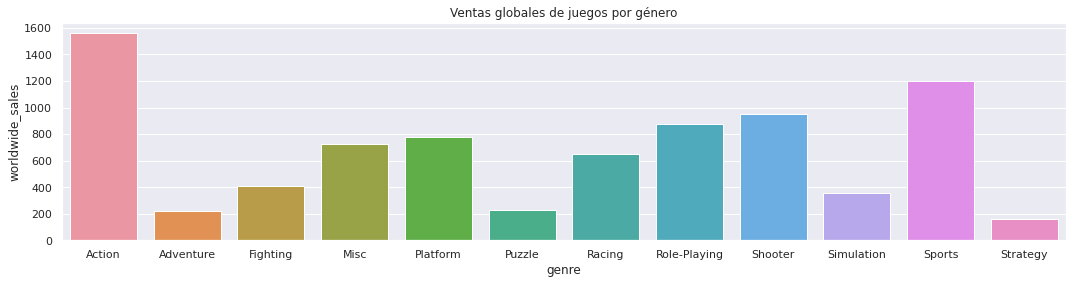

In [98]:
# Primero obtenemos la tabla con groupby y vemos los valores totales
data = wip_games[['worldwide_sales','genre']].groupby('genre').sum().reset_index()

# Definimos el tamaño de nuestro gráfico
sns.set(rc={'figure.figsize':(18,4)})

# Graficamos
sns.barplot(data= data,x='genre',y='worldwide_sales').set(title='Ventas globales de juegos por género')

# Y no nos olvidamos el show para que todo quede limpio
plt.show()

Podemos ver como *Action* tiene la mayor cantidad total de ventas, *Sports* le sigue aunque con una buena diferencia y tambien notamos como *Adventure, Puzzle, Simulation y Strategy* se ubican muy por debajo del resto de los generos. Aunque tambien sabemos que *Action y Sports* son los generos con la mayor cantidad de juegos por lo que mejor veamos otros valores.

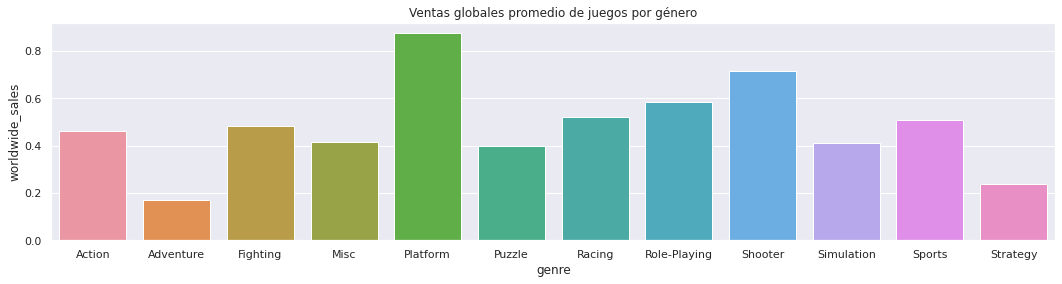

In [99]:
# Veamos las ventas promedio de juegos separados por genero
data = wip_games[['worldwide_sales','genre']].groupby('genre').mean().reset_index()

# Definimos el tamaño de nuestro gráfico
sns.set(rc={'figure.figsize':(18,4)})

# Graficamos
sns.barplot(data= data,x='genre',y='worldwide_sales').set(title='Ventas globales promedio de juegos por género')

# Y no nos olvidamos el show para que todo quede limpio
plt.show()

Al parecer las ventas totales no reflejaban la realidad detras de los numeros! En este caso podemos ver como el genero *Platform* se levanta por encima del resto como la mejor opción si uno quiere recaudar la mayor cantidad de ventas. Y *Adventure*... sigue conservando un puesto en los últimos lugares... será que es muy dificil hacer un buen juego de aventura?

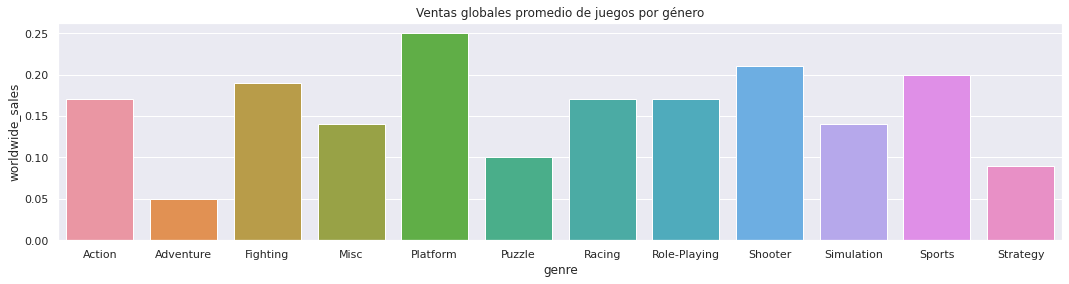

In [100]:
# Ante la sospecha de valores atipicos voy a hacer lo mismo pero obteniendo la mediana
data = wip_games[['worldwide_sales','genre']].groupby('genre').median().reset_index()

# Definimos el tamaño de nuestro gráfico
sns.set(rc={'figure.figsize':(18,4)})

# Graficamos
sns.barplot(data= data,x='genre',y='worldwide_sales').set(title='Ventas globales promedio de juegos por género')

# Y no nos olvidamos el show para que todo quede limpio
plt.show()

Al parecer nuestras sospechas eran ciertas! Viendo el eje y podemos notar aunque no parezca que todos los géneros eran altamente influenciados por valores atípicamente altos. Aunque si hablamos comparativamente entre género y género notamos como las cosas cambiaron menos. *Platform* sigue siendo el género más rentable, *Adventure* el menos rentable y vemos como *Action* se ve mucho más prometedor!
  
Aunque si lo pensamos bien, un desarrollador de videojuegos no quiere que su juegos sea simplemente una máquina de hacer billetes del montón, un desarrollador apasionado quiere que su juego quede para la historia! Por lo que ahora quiero sentarme un momento y ver cuales son los juegos que más vendieron!

In [101]:
# Filtrar eso es fácil, reinicio el indice para una mejor visualizacion
wip_games.loc[wip_games.worldwide_sales >= wip_games['worldwide_sales'].quantile(0.99),:]['genre'].value_counts().reset_index()

,index,genre
0,Shooter,31
1,Platform,28
2,Role-Playing,27
3,Action,25
4,Racing,14
5,Misc,13
6,Sports,12
7,Fighting,7
8,Puzzle,5
9,Simulation,5


Al parecer los puestos mas altos de los videojuegos estan ocupados en su mayoría por *Shooter, Platform y Role-Playing*! Aunque si uno piensa en juegos como Call of Duty, Mario Bros y WoW tiene sentido que esos sean los primeros puestos.

Entonces, cuál es el género que más rentabilidad demuestra? En base a lo que vimos no puedo designar un género por encima pero ciertamente podemos decir que *Shooter y Platform* destacan por encima y no hay que quitarle mérito a *Role-Playing* ya que a pesar de nunca ser el mayor, se ubicó consistentemente en los escalafones altos a lo largo del estudio. Y lo que si podemos destacar con seguridad es que los géneros *Adventure y Strategy* son los menos rentables. 

## <a id='toc4_3_'></a>[Separando por regiones](#toc0_)
  
Ahora vamos a buscar explotar el hecho de que las ventas están separadas por regiones (NA, EU, JP y other), en éste caso nos vamos a enfocar unicamente en las regiones definidas estrictamente: Estados Unidos, Europa y Japón. Primero vamos a observar cuales fueron las consolas dominantes en cada región, tanto a lo largo del tiempo como en los últimos años.

In [102]:
pd.melt(
    wip_games[['platform','na_sales','eu_sales','jp_sales']],
      id_vars=['platform'], var_name= 'regions',
      value_vars=['na_sales','eu_sales','jp_sales'], value_name= 'sales'
      ).groupby(['platform','regions']).sum().reset_index()

,platform,regions,sales
0,2600,eu_sales,5.47
1,2600,jp_sales,0.00
2,2600,na_sales,90.60
3,3DO,eu_sales,0.00
4,3DO,jp_sales,0.10
...,...,...,...
88,XB,jp_sales,1.38
89,XB,na_sales,186.69
90,XOne,eu_sales,51.59
91,XOne,jp_sales,0.34


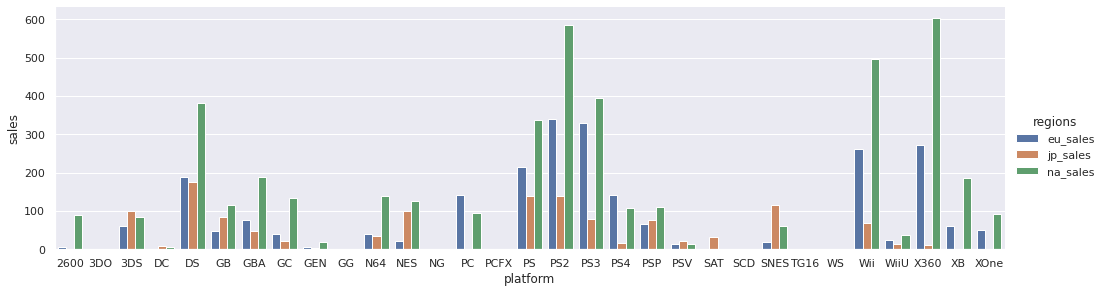

In [104]:
# Primero creamos una tabla larga para poder graficar segun las diferentes regiones 
data = pd.melt(
    wip_games[['platform','na_sales','eu_sales','jp_sales']],
      id_vars=['platform'], var_name= 'regions',
      value_vars=['na_sales','eu_sales','jp_sales'], value_name= 'sales'
      ).groupby(['platform','regions']).sum().reset_index()

# Con la tabla hecha solo queda graficar con catplot
sns.catplot(
    data= data,
    x='platform',
    y='sales',
    hue='regions',
    kind='bar',
    height=4,
    aspect=3.5
)

# Y no nos tenemos que olvidar del show
plt.show()

Lo primero que podemos observar de nuestra gráfica es los que representan las diferentes cuotas de los mercados cada región. Podemos notar como *NA* es de las tres regiones la que más cuota acapara seguida por *EU* y finalmente *JP* siendo la región mayor que menos cuota observable tiene.
  
Ahora nos tomemos un momento y veamos cuales son las plataformas dominantes en cada región.
  
**Top 5 plataformas de NA**
1. X360
2. PS2
3. Wii
4. PS4
5. DS

**Top 5 plataformas de EU**
1. PS2
2. PS3
3. X360
4. Wii
5. PS
    
  
**Top 5 plataformas de JP**
1. DS
2. PS
3. PS2
4. SNES
5. 3DS

Con el análisis de plataformas según la región terminado, vamos a pasara realizar lo mismo pero ésta vez tomando el enfoque en `genre`. Sin más vueltas, vamos a programar!

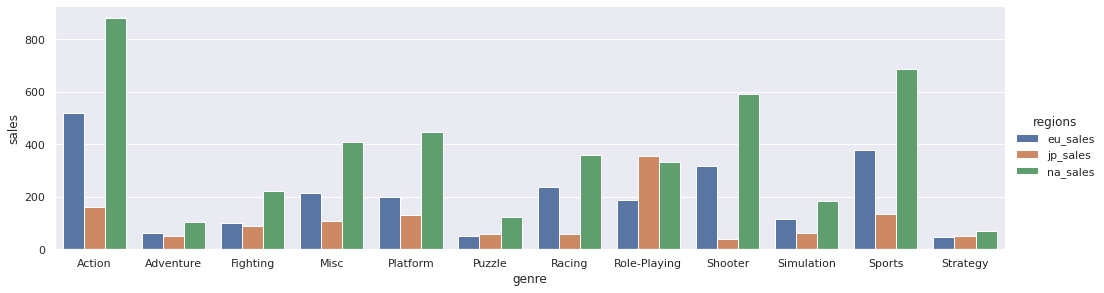

In [105]:
# Primero creamos una tabla larga para poder graficar segun las diferentes regiones 
data = pd.melt(
    wip_games[['genre','na_sales','eu_sales','jp_sales']],
      id_vars=['genre'], var_name= 'regions',
      value_vars=['na_sales','eu_sales','jp_sales'], value_name= 'sales'
      ).groupby(['genre','regions']).sum().reset_index()

# Con la tabla hecha solo queda graficar con catplot
sns.catplot(
    data= data,
    x='genre',
    y='sales',
    hue='regions',
    kind='bar',
    height=4,
    aspect=3.5
)

# Y no nos tenemos que olvidar del show
plt.show()

Ésta gráfica es más fácil de analizar pues tenemos muchas menos columnas que en el caso de `platform`. En éste caso notamos como NA y EU siguen un patrón similar entre sí mientras que JP presenta un comportamiento bastante diferente. 
  
Sin ir más lejos vamos a ver cuales son los géneros más popualares por región:
  
**Top 5 géneros NA**
1. Action
2. Sports
3. Shooter
4. Platform
5. Misc

**Top 5 géneros EU**
1. Action
2. Sports
3. Shooter
4. Racing
5. Misc

**Top 5 géneros JP**
1. Role-Playing
2. Action
3. Sports
4. Platform
5. Misc
  
Ciertamente JP presenta un comportamiento muy diferente siendo que su primer puesto es uno que no llega ni al top 5 en las otras 2 regiones. Otra cosa que me llama la atención no es que Action y Sports tengan tanta presencia en todas las regiones (pues ya teniamos demasiadas pistas de que algo así iba a pasar) sino que *Misc* ocupa el 5to puesto en todas las regiones. Mi hipótesis es que *Misc* engloba multiples géneros que por su cuenta no valian la pena categorizar (o no se podía) y al juntar tantas categorías resultó en que ése género supere al resto.

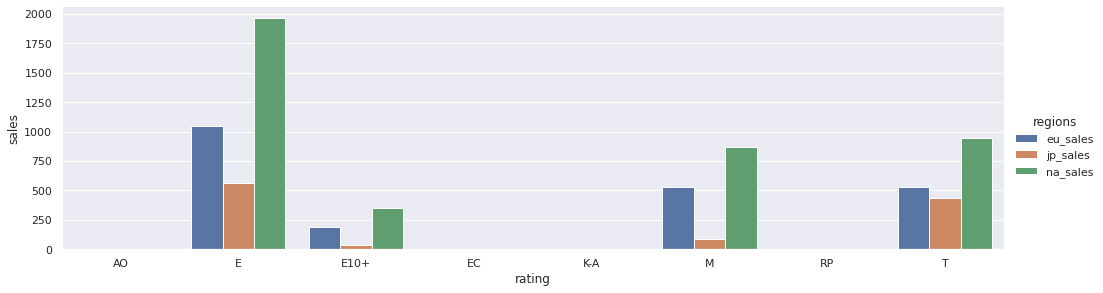

In [106]:
# Primero creamos una tabla larga para poder graficar segun las diferentes regiones 
data = pd.melt(
    wip_games[['rating','na_sales','eu_sales','jp_sales']],
      id_vars=['rating'], var_name= 'regions',
      value_vars=['na_sales','eu_sales','jp_sales'], value_name= 'sales'
      ).groupby(['rating','regions']).sum().reset_index()

# Con la tabla hecha solo queda graficar con catplot
sns.catplot(
    data= data,
    x='rating',
    y='sales',
    hue='regions',
    kind='bar',
    height=4,
    aspect=3.5
)

# Y no nos tenemos que olvidar del show
plt.show()

El análisis que hicimos previamente de `rating` vino útil ahora ya que podemos inferir un poco de lo observado sobre lo que vemos acá. En éste caso notamos como el comportamiento de NA y EU son una vez más similares y correspondientes a las concentraciones que vimos al analizar la columna previamente.
  
Por su parte JP presenta un comportamiento destacable en el que la categoría *E* se encuentra como la más popular pero por una diferencia mucho menor a EU, NA y a la esperada. Tambien podemos observar como la categoría *M* presenta una cantidad desproporcionalmente baja más allá de que JP tenga menores números totales. Todo ese comportamiento anómalo se explica con la destacable presencia de *T* para JP ya que si volvemos atrás podemos notar que los juegos de *Role-Playing* se presentan mayoritariamente en la categoría *T* por lo que si unimos puntos notamos la correlación entre los gráficos que vamos haciendo.
  
Acá concluimos nuestro análisis exploratiorio de los datos, lo que pudimos observar fue:
- Respecto a las plataformas
    - La forma en la que las diferentes generaciones de consolas iban cambiando a lo largo de los años
    - Todas las plataformas que nunca llegaron a consolidarse a lo largo de los años
    - Como el éxito de ventas de juegos de una plataforma parecen ser dependientes de l s juegos atípicos
    - Los `user_score` y `critic_score` no parecen tener una relación muy fuertes con la cantidad de ventas de un juego
- Respecto a el género del juego
    - Pudimos observar los géneros con la mayor cantidad de ventas
    - Al analizar bien notamos que éstos diferian si en vez del total veíamos el promedio
    - De todas formas los juegos con mayor recaudación de la historia se encontraban dentro de los géneros con la mayor cantidad de ventas argumentando a favor de los valores atípicos
- Respecto a las regiones
    - Notamos como mientras que NA y EU poseían comportamientos similares, JP tendía a alejarse un poco tanto en sus plataformas de preferencia cómo en los géneros
    - NA demostró ser la región que más cuota del mercado presenta, seguido de EU y finalmente JP
    - Al separar las regiones por `rating` pudimos observar como éstas más que influenciar las ventas, eran consecuencia de otros detalles como `genre` por ejemplo

# <a id='toc5_'></a>[Prueba de hipótesis](#toc0_)
  
Con el EDA terminado vamos a avanzar al plato principal y poner a prueba nuestras hipótesis después de trabajar con la tabla y imputar los valores faltantes. Antes que nada repasemos las hipótesis:
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
  
Al realizar la prueba de hipótesis con la tabla `clean_games` que consistía únicamente de las filas que no tenían ningún valor nulo en sus celdas ,a costa de perder la mitad de ellas, nos encontramos con que ésta hipótesis era la hipótesis nula y tras realizar la prueba ésta fue rechazada.
  
La segunda hipótesis era:
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
  
En éste caso nos encontramos con que nuestra hipótesis a probar tenía que ser la hipótesis alternativa y tras realizar la prueba con la tabla `clean_games` la evidencia no era suficiente como para refutar la hipótesis nula en favor de la alternativa.
  
Ahora vamos a realizar un procedimiento similar al anterior y poner a pruebas las dos hipótesis que tenemos.

Primero designamos la hipótesis nula y alternativa:
- H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes mismas.
  
Vamos a usar una prueba de conjuntos independientes ya que en base a lo que vimos hasta ahora tenemos confianza en que las varianzas son diferentes. Y vamos a designar el grado de significancia estándar de 5%.

In [ ]:
# Vamos a probar la hipotesis

# Tomamos el alfa que dijimos previamente
alpha = 0.05

# Cargamos los datos para someterlos a hipotesis posteriormente
XOne_array = wip_games.loc[wip_games.platform == 'XOne']['user_score'].values
PC_array = wip_games.loc[wip_games.platform == 'PC']['user_score'].values

# Como sabemos que las varianzas son diferentes en cada grupo, establecemos el parámetro equal_var como Falso
results = st.ttest_ind(XOne_array, PC_array, equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

Al parecer nuestro trabajo imputando valores solo redujo el `p-value` en 1 nivel de magnitúd causando que la hipótesis en cuestión sea rechazada en favor a la alternativa!
  
Sin muchas vueltas vamos a abordar la segunda hipótesis

Primero designamos la hipótesis nula y alternativa:
- H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
- H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
  
Para ésta prueba vamos a usar de vuelta la prueba para conjuntos independientes aunque ésta vez vamos a realizar una prueba de Levene para determinar si las varianzas de nuestros conjuntos son estadísticamente iguales o no. Al igual que antes vamos a mantener el nivel de significancia en el 5%.

In [ ]:
# Primero definimos el alpha
alpha = 0.05

# De ahi realizamos la prueba de Levene
results = st.levene(wip_games.loc[wip_games.genre == 'Action']['user_score'],wip_games.loc[wip_games.genre == 'Sports']['user_score'])

# Finalmente imprimimos el pvalue y el resultado de la prueba
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Las varianzas son estadisticamente diferentes')
else:
    print("No podemos afirmar que las varianzas son estadisticamente diferentes")

In [ ]:
# Vamos a probar la hipotesis

# Tomamos el alfa que dijimos previamente
alpha = 0.05

# Cargamos los datos para someterlos a hipotesis posteriormente
Sports_array = wip_games.loc[wip_games.genre == 'Sports']['user_score'].values
Action_array = wip_games.loc[wip_games.genre == 'Action']['user_score'].values

# Como sabemos que las varianzas no son diferentes en cada grupo, establecemos el parámetro equal_var como True
results = st.ttest_ind(Sports_array, Action_array, equal_var=True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

Al parecer el pvalue en éste caso bajó tambien, aunque aún se encuentra muy alto como para permitirnos rechazar la hipótesis nula en favor de la hipótesis planteada. 
  
Por lo que nos quedamos con que de las dos hipótesis que debíamos probar solo encontramos a la primera como cierta mientras que la segunda no.

# <a id='toc6_'></a>[Conclusión general](#toc0_)
  
Éste fue un dataset muy interesante de trabajar con una profundidad moderadad sobre el que se pueden decir muchas cosas. 
  
Vamos a empezar con lo negativo, eso es la gran presencia de datos ausentes. Para nuestra suerte no encontramos ninguno de ellos en las columnas relacionadas con las ventas ya que inputar esos valores hubiese sido difícil y la presencia de tantos datos atípicos hubiese impactado severamente en la fidelidad del reemplazo. De todas formas nos encontramos con datos faltantes principalmente en las columnas `user_score` y `critic_score` las cuales forman un rol fundamental en las pruebas de hipótesis. Con la mitad de los datos faltando no me sorprendería si alguna de las hipótesis hubiese cambiado de tener todos los datos. También encontramos datos faltantes en otras columnas pero en una propoción mucho menor y en columnas categóricas las cuales permiten con más facilidad el reemplazo con un cierto nivel de confianza. 

Respecto al motivo que causó la presencia de esos valores ausentes, la verdad que no se me ocurre nada conciso. No parece haber una relación entre los valores ausentes con otras columnas ni parece haber un patrón claro sobre que no tienen dichos juegos. Si bien es verdad que hay muchas plataformas que tienen una falta completa de los valores, tambien es verdad que corresponden a plataformas que no tienen un gran volumen de juegos en el dataset por lo que la posibilidad de que simplemente hayan tenido todos sus valores eliminados es completamente plausible.

Por otra parte, el EDA brindó mucho entendimiento sobre el comportamiento de los datos en aspectos que me parecían particulamente interesante. Logramos observar como poco a poco se unían los puntos y se hacían visibles las relaciones entre las diferentes columans. Principalmente se alcanzó esa culminación cuando se separó por regiones y se observó como el impacto de de las preferencias en `genre` causaron una tendencia en `rating` y aunque no conozco tantos juegos de DS o SNES, no me sorprendería que los juegos de *Role-Playing* de esas consolas estén más consolidadas en JP.
  
Ahora, respecto a las hipótesis, nos encontramos con que una de nuestras hipótesis parece ser válida mientras que la otra no. Si prestamos atención notamos como al comparar dos plataformas encontramos que sus calificaciónes son efectivamente diferentes y eso cuadra ya que diferentes plataformas ofrecen diferentes funcionalidades para un juego y aún si comparasemos el mismo juego no sería sorpresa que tengan una nota diferente entre diferentes plataformas. Mientras tanto, la hipótesis rechazada fue la que comparaba `genre` y de vuelta, el resultado tiene sentido ya que de no serlo eso representaría un sesgo de parte de los usuarios y de los críticos por un género sobre otro cuándo lo que hay que hacer es juzgar a cada género dentro de sus propios estándares pero manteniendo objetiva la vista al compararla con otros géneros.
  
Finalmente, y no me voy a cansar de ésto, no hay que olvidarnos que los datos que vemos no representan el éxito de una consola ya que estamos viendo los juegos. Y aunque es un solo ejemplo, también hay que destacar que no hay que atribuir el éxito de un juego a sí mismo. Por que? Mi argumento a favor de esa frase es que uno de los juegos que más ventas registra dentro de la tabla es el **Wii Sports** pero algo que no viene aclarado es que el **Wii Sports** venía incluido en todas las *Nintendo Wii* (que fue un rotundo éxito como consola) por lo que estrictamente muy poca gente compró el juego en sí. Obviamente la frase no es absoluta, sino todo lo contrario pero por más que sea para casos excepcionales hay que tener en mente eso antes de juzgar lo que vemos en la tabla.